In [7]:
# import naming conventions 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
from statistics import mean, median, mode, stdev
import scipy.stats as stats
import seaborn as sns
import os

#Read File
dir_path = os.path.join(os.path.abspath(''),"500_Cities__Local_Data_for_Better_Health__2019_release.csv")
data = pd.read_csv(dir_path)

#Remove Empty Columns
data = data.dropna(how='all', axis=1)
data = data[data["CityName"].notnull()]

#Pick Age-Adjusted Prevalence Only
ageAdj = data[data["DataValueTypeID"]=="AgeAdjPrv"]

#Pivot Tables
grand_view = pd.pivot_table(ageAdj, values='Data_Value', index=["StateDesc","CityName"], columns=["Category","Short_Question_Text"])

labels = pd.pivot_table(ageAdj, values='Data_Value', index=["StateDesc","CityName"], columns=["Category","MeasureId","Short_Question_Text"])

In [3]:
pd.read_csv(dir_path).shape

(810103, 24)

In [4]:
ageAdj.shape

(14000, 24)

In [5]:
grand_view.shape

(500, 28)

In [2]:
grand_view

Category             Health Outcomes                            \
Short_Question_Text        Arthritis COPD Cancer (except skin)   
StateDesc CityName                                               
Alabama   Birmingham            29.8  9.2                  5.8   
          Hoover                24.4  5.4                  6.5   
          Huntsville            28.3  7.8                  6.5   
          Mobile                29.0  8.5                  6.1   
          Montgomery            28.7  8.7                  6.2   
...                              ...  ...                  ...   
Wisconsin Madison               20.7  4.2                  6.4   
          Milwaukee             25.2  6.6                  5.9   
          Racine                24.7  6.3                  6.2   
          Waukesha              23.8  4.8                  6.5   
Wyoming   Cheyenne              22.6  5.8                  6.4   

Category                                                            \
Short_Question_Text  Chronic Kidney Disease Coronary Heart Disease   
StateDesc CityName                                                   
Alabama   Birmingham                    4.0                    7.3   
          Hoover                        2.4                    4.7   
          Huntsville                    3.1                    6.4   
          Mobile                        3.5                    7.1   
          Montgomery                    3.6                    7.0   
...                                     ...                    ...   
Wisconsin Madison                       2.5                    4.6   
          Milwaukee                     3.7                    6.3   
          Racine                        3.3                    6.0   
          Waukesha                      2.6                    4.9   
Wyoming   Cheyenne                      2.6                    5.2   

Category                                                          \
Short_Question_Text  Current Asthma Diabetes High Blood Pressure   
StateDesc CityName                                                 
Alabama   Birmingham           12.1     16.2                45.2   
          Hoover                9.2      8.1                31.4   
          Huntsville           10.8     11.4                36.9   
          Mobile               11.5     13.5                41.2   
          Montgomery           11.4     14.3                41.8   
...                             ...      ...                 ...   
Wisconsin Madison               9.1      7.1                25.9   
          Milwaukee            11.3     11.3                34.4   
          Racine               10.7     10.1                32.1   
          Waukesha              9.2      7.5                27.3   
Wyoming   Cheyenne              9.6      8.2                29.1   

Category                                             ...   Prevention  \
Short_Question_Text  High Cholesterol Mental Health  ... Dental Visit   
StateDesc CityName                                   ...                
Alabama   Birmingham             31.9          16.8  ...         52.5   
          Hoover                 30.1          11.5  ...         74.5   
          Huntsville             30.3          15.1  ...         61.1   
          Mobile                 31.5          16.3  ...         58.4   
          Montgomery             32.2          15.8  ...         60.6   
...                               ...           ...  ...          ...   
Wisconsin Madison                29.2          10.8  ...         74.2   
          Milwaukee              29.6          15.3  ...         58.9   
          Racine                 30.7          13.9  ...         62.6   
          Waukesha               29.1          11.7  ...         73.3   
Wyoming   Cheyenne               27.0          11.6  ...         69.2   

Category                                                          \
Short_Question_Text  Health Insurance Mammography 

In [3]:
labels.transpose().iloc[:,0:0]

Empty DataFrame
Columns: []
Index: [(Health Outcomes, ARTHRITIS, Arthritis), (Health Outcomes, BPHIGH, High Blood Pressure), (Health Outcomes, CANCER, Cancer (except skin)), (Health Outcomes, CASTHMA, Current Asthma), (Health Outcomes, CHD, Coronary Heart Disease), (Health Outcomes, COPD, COPD), (Health Outcomes, DIABETES, Diabetes), (Health Outcomes, HIGHCHOL, High Cholesterol), (Health Outcomes, KIDNEY, Chronic Kidney Disease), (Health Outcomes, MHLTH, Mental Health), (Health Outcomes, PHLTH, Physical Health), (Health Outcomes, STROKE, Stroke), (Health Outcomes, TEETHLOST, Teeth Loss), (Prevention, ACCESS2, Health Insurance), (Prevention, BPMED, Taking BP Medication), (Prevention, CHECKUP, Annual Checkup), (Prevention, CHOLSCREEN, Cholesterol Screening), (Prevention, COLON_SCREEN, Colorectal Cancer Screening), (Prevention, COREM, Core preventive services for older men), (Prevention, COREW, Core preventive services for older women), (Prevention, DENTAL, Dental Visit), (Prevention, MAMMOUSE, Mammography), (Prevention, PAPTEST, Pap Smear Test), (Unhealthy Behaviors, BINGE, Binge Drinking), (Unhealthy Behaviors, CSMOKING, Current Smoking), (Unhealthy Behaviors, LPA, Physical Inactivity), (Unhealthy Behaviors, OBESITY, Obesity), (Unhealthy Behaviors, SLEEP, Sleep <7 hours)]

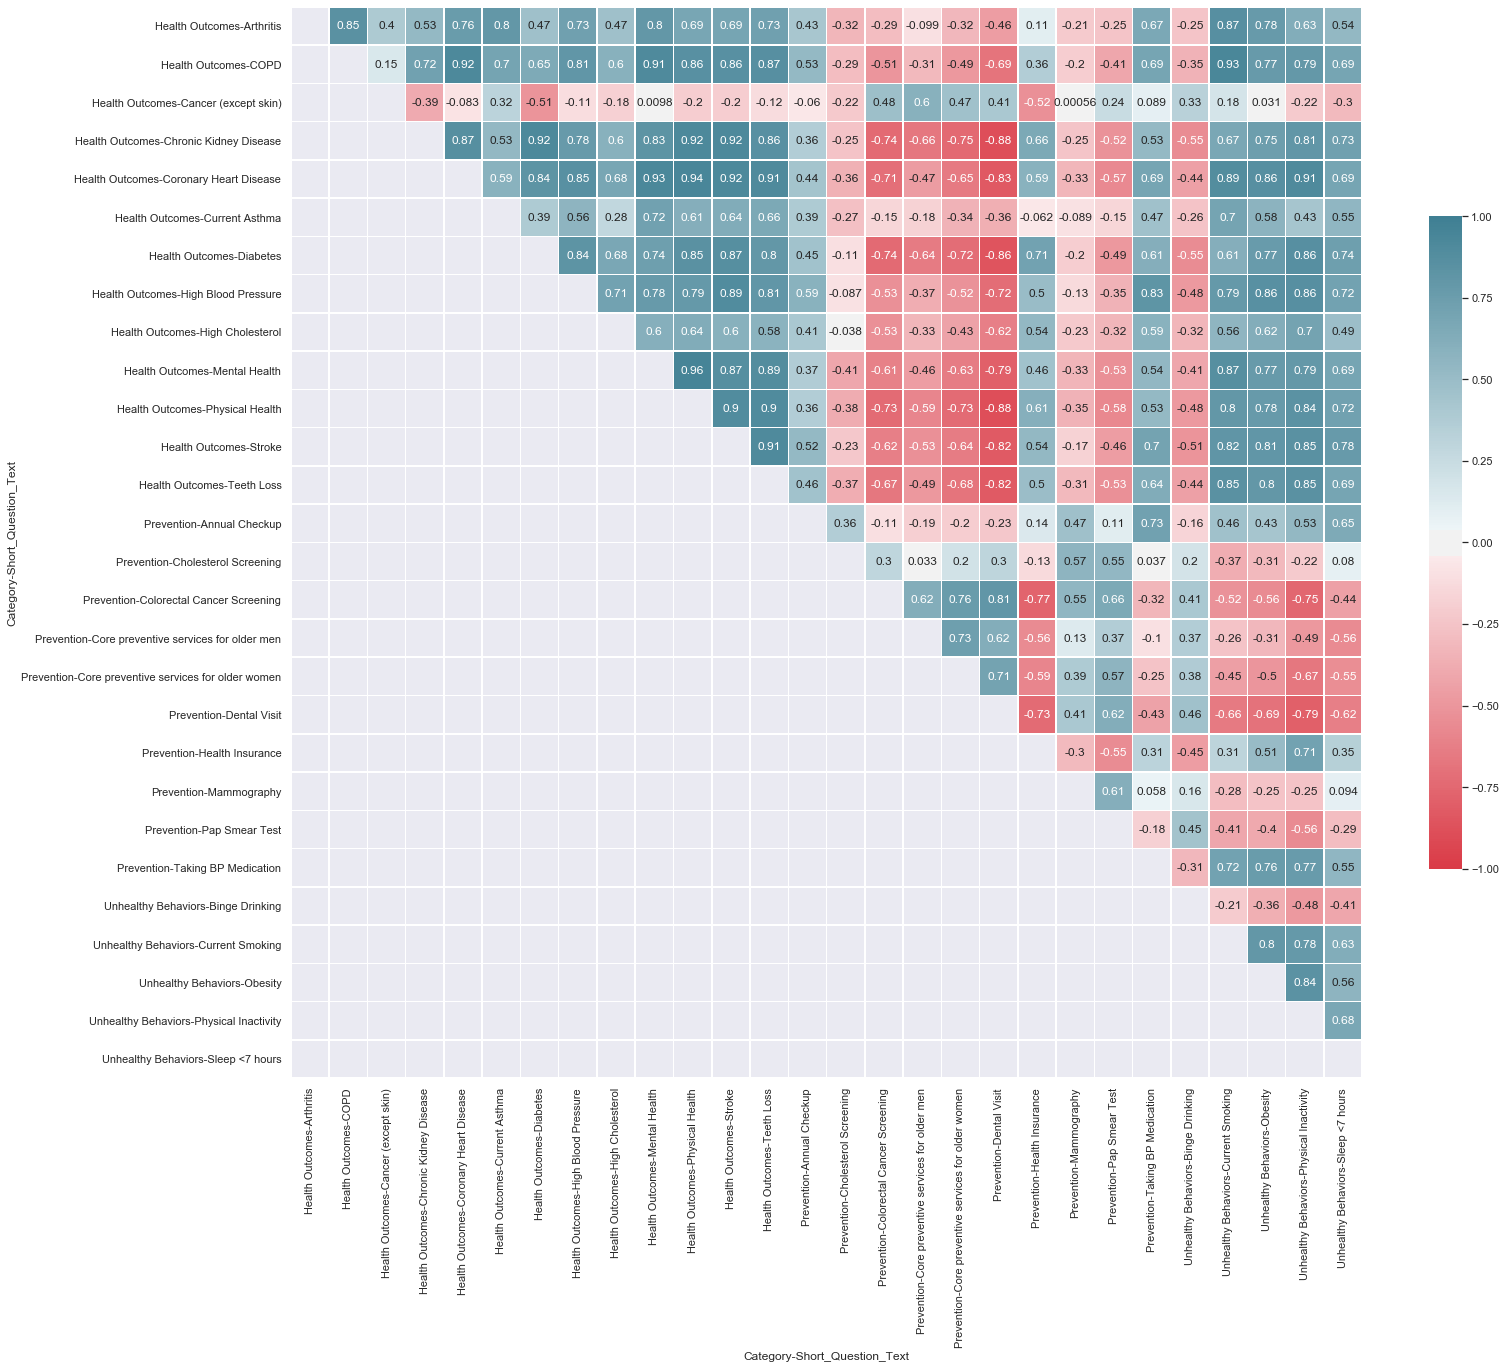

In [4]:
picked_view = grand_view #.loc[:,["Unhealthy Behaviors","Health Outcomes"]]

corr = picked_view.corr()
corrx = corr
sns.set(color_codes=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 24))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
#generate mask
mask = np.triu(np.ones_like(corrx, dtype=np.bool))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrx, mask=mask.transpose(),cmap=cmap, vmin=-1.0,center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=95.48457750628133, pvalue=0.0)
Ttest_indResult(statistic=106.68686621822549, pvalue=0.0)
Ttest_indResult(statistic=126.22778365691559, pvalue=0.0)
Ttest_indResult(statistic=105.29919510941342, pvalue=0.0)
Ttest_indResult(statistic=79.78752587248918, pvalue=0.0)
Ttest_indResult(statistic=62.1541164687664, pvalue=0.0)
Ttest_indResult(statistic=-32.478215785897326, pvalue=1.7699700594551775e-158)
Ttest_indResult(statistic=-41.809252819897736, pvalue=1.4242837931408425e-221)
Ttest_indResult(statistic=48.685027939132326, pvalue=7.429091834439233e-266)
Ttest_indResult(statistic=50.878234503794836, pvalue=1.7888596436879076e-279)
Ttest_indResult(statistic=124.37806100475497, pvalue=0.0)
Ttest_indResult(statistic=28.06069204801223, pvalue=3.3829955386621354e-128)
Ttest_indResult(statistic=-180.8913584913929, pvalue=0.0)
Ttest_indResult(statistic=-300.45598654805923, pvalue=0.0)
Ttest_indResult(statistic=-140.66517848723527, p

Ttest_indResult(statistic=35.67342849024637, pvalue=2.4001327171451965e-180)
Ttest_indResult(statistic=60.570017392073865, pvalue=0.0)
Ttest_indResult(statistic=111.6053015488746, pvalue=0.0)
Ttest_indResult(statistic=54.22065238752481, pvalue=9.903665025375012e-300)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=-7.942007417094142, pvalue=5.337478410101854e-15)
Ttest_indResult(statistic=-95.66445096022943, pvalue=0.0)
Ttest_indResult(statistic=-195.86995089198666, pvalue=0.0)
Ttest_indResult(statistic=-35.52493569612934, pvalue=2.4686303337116995e-179)
Ttest_indResult(statistic=-25.667697445318883, pvalue=5.600353419489051e-112)
Ttest_indResult(statistic=102.420737504876, pvalue=0.0)
Ttest_indResult(statistic=-22.453206834619277, pvalue=1.0597317421809513e-90)
Ttest_indResult(statistic=-273.91508744950033, pvalue=0.0)
Ttest_indResult(statistic=-537.2736815189991, pvalue=0.0)
Ttest_indResult(statistic=-206.8750154940526, pvalue=0.0)
Ttest_indResult(statistic=-91.5

Ttest_indResult(statistic=-74.34999032545501, pvalue=0.0)
Ttest_indResult(statistic=-118.42227495915584, pvalue=0.0)
Ttest_indResult(statistic=-5.309444148042411, pvalue=1.3553760911031632e-07)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=82.11289721866433, pvalue=0.0)
Ttest_indResult(statistic=-7.899541902371374, pvalue=7.360326960108537e-15)
Ttest_indResult(statistic=-236.12482592765525, pvalue=0.0)
Ttest_indResult(statistic=-410.1224941610072, pvalue=0.0)
Ttest_indResult(statistic=-182.7721103821536, pvalue=0.0)
Ttest_indResult(statistic=-74.91349253269391, pvalue=0.0)
Ttest_indResult(statistic=-78.11369337441762, pvalue=0.0)
Ttest_indResult(statistic=-142.1464749676806, pvalue=0.0)
Ttest_indResult(statistic=-12.18966420496618, pvalue=5.820711139016314e-32)
Ttest_indResult(statistic=-312.41012794540336, pvalue=0.0)
Ttest_indResult(statistic=-334.9377550844816, pvalue=0.0)
Ttest_indResult(statistic=-177.30366228298774, pvalue=0.0)
Ttest_indResult(statistic=-31

Ttest_indResult(statistic=170.66747388425225, pvalue=0.0)
Ttest_indResult(statistic=192.24874677654518, pvalue=0.0)
Ttest_indResult(statistic=140.66517848723527, pvalue=0.0)
Ttest_indResult(statistic=215.2684411467951, pvalue=0.0)
Ttest_indResult(statistic=223.76148420278162, pvalue=0.0)
Ttest_indResult(statistic=235.0678712449491, pvalue=0.0)
Ttest_indResult(statistic=222.41341971461958, pvalue=0.0)
Ttest_indResult(statistic=206.8750154940526, pvalue=0.0)
Ttest_indResult(statistic=189.95774998218553, pvalue=0.0)
Ttest_indResult(statistic=99.83956320153196, pvalue=0.0)
Ttest_indResult(statistic=127.61805544897045, pvalue=0.0)
Ttest_indResult(statistic=183.2794642753281, pvalue=0.0)
Ttest_indResult(statistic=182.7721103821536, pvalue=0.0)
Ttest_indResult(statistic=233.91079358085577, pvalue=0.0)
Ttest_indResult(statistic=145.2314210000953, pvalue=0.0)
Ttest_indResult(statistic=-13.383537945784417, pvalue=1.0851196966740948e-37)
Ttest_indResult(statistic=-53.709050894106056, pvalue=1.140

Ttest_indResult(statistic=-106.84470715470712, pvalue=0.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=-179.01335714864723, pvalue=0.0)
Ttest_indResult(statistic=-181.8900840829547, pvalue=0.0)
Ttest_indResult(statistic=-112.5596586201557, pvalue=0.0)
Ttest_indResult(statistic=-4.529227255768591, pvalue=6.634746371838844e-06)
Ttest_indResult(statistic=-2.8012719227948213, pvalue=0.005188543644549262)
Ttest_indResult(statistic=-35.2731204770489, pvalue=1.2886207670373708e-177)
Ttest_indResult(statistic=-25.488554626898065, pvalue=8.954786813439947e-111)
Ttest_indResult(statistic=-56.236109750825364, pvalue=1.186333865666e-311)
Ttest_indResult(statistic=236.37111549941096, pvalue=0.0)
Ttest_indResult(statistic=381.0360792650772, pvalue=0.0)
Ttest_indResult(statistic=415.42820667304477, pvalue=0.0)
Ttest_indResult(statistic=432.6219162296056, pvalue=0.0)
Ttest_indResult(statistic=405.0874978277286, pvalue=0.0)
Ttest_indResult(statistic=377.8629505281323, pvalue=0.

Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=-38.27101003003276, pvalue=5.877894637080175e-198)
Ttest_indResult(statistic=-26.7768200148289, pvalue=1.818108436109229e-119)
Ttest_indResult(statistic=-66.36629036635773, pvalue=0.0)
Ttest_indResult(statistic=25.788417109369913, pvalue=8.630157613770019e-113)
Ttest_indResult(statistic=83.44783722680137, pvalue=0.0)
Ttest_indResult(statistic=86.76306114853297, pvalue=0.0)
Ttest_indResult(statistic=97.41280957303424, pvalue=0.0)
Ttest_indResult(statistic=87.17576901745454, pvalue=0.0)
Ttest_indResult(statistic=73.38363250847785, pvalue=0.0)
Ttest_indResult(statistic=65.88233297406227, pvalue=0.0)
Ttest_indResult(statistic=-0.9729955415986478, pvalue=0.33079128301051086)
Ttest_indResult(statistic=3.2000006246413735, pvalue=0.0014176227394136656)
Ttest_indResult(statistic=57.07403588391462, pvalue=1.5231127e-316)
Ttest_indResult(statistic=58.79182761829003, pvalue=0.0)
Ttest_indResult(statistic=96.88035076592297, pvalue

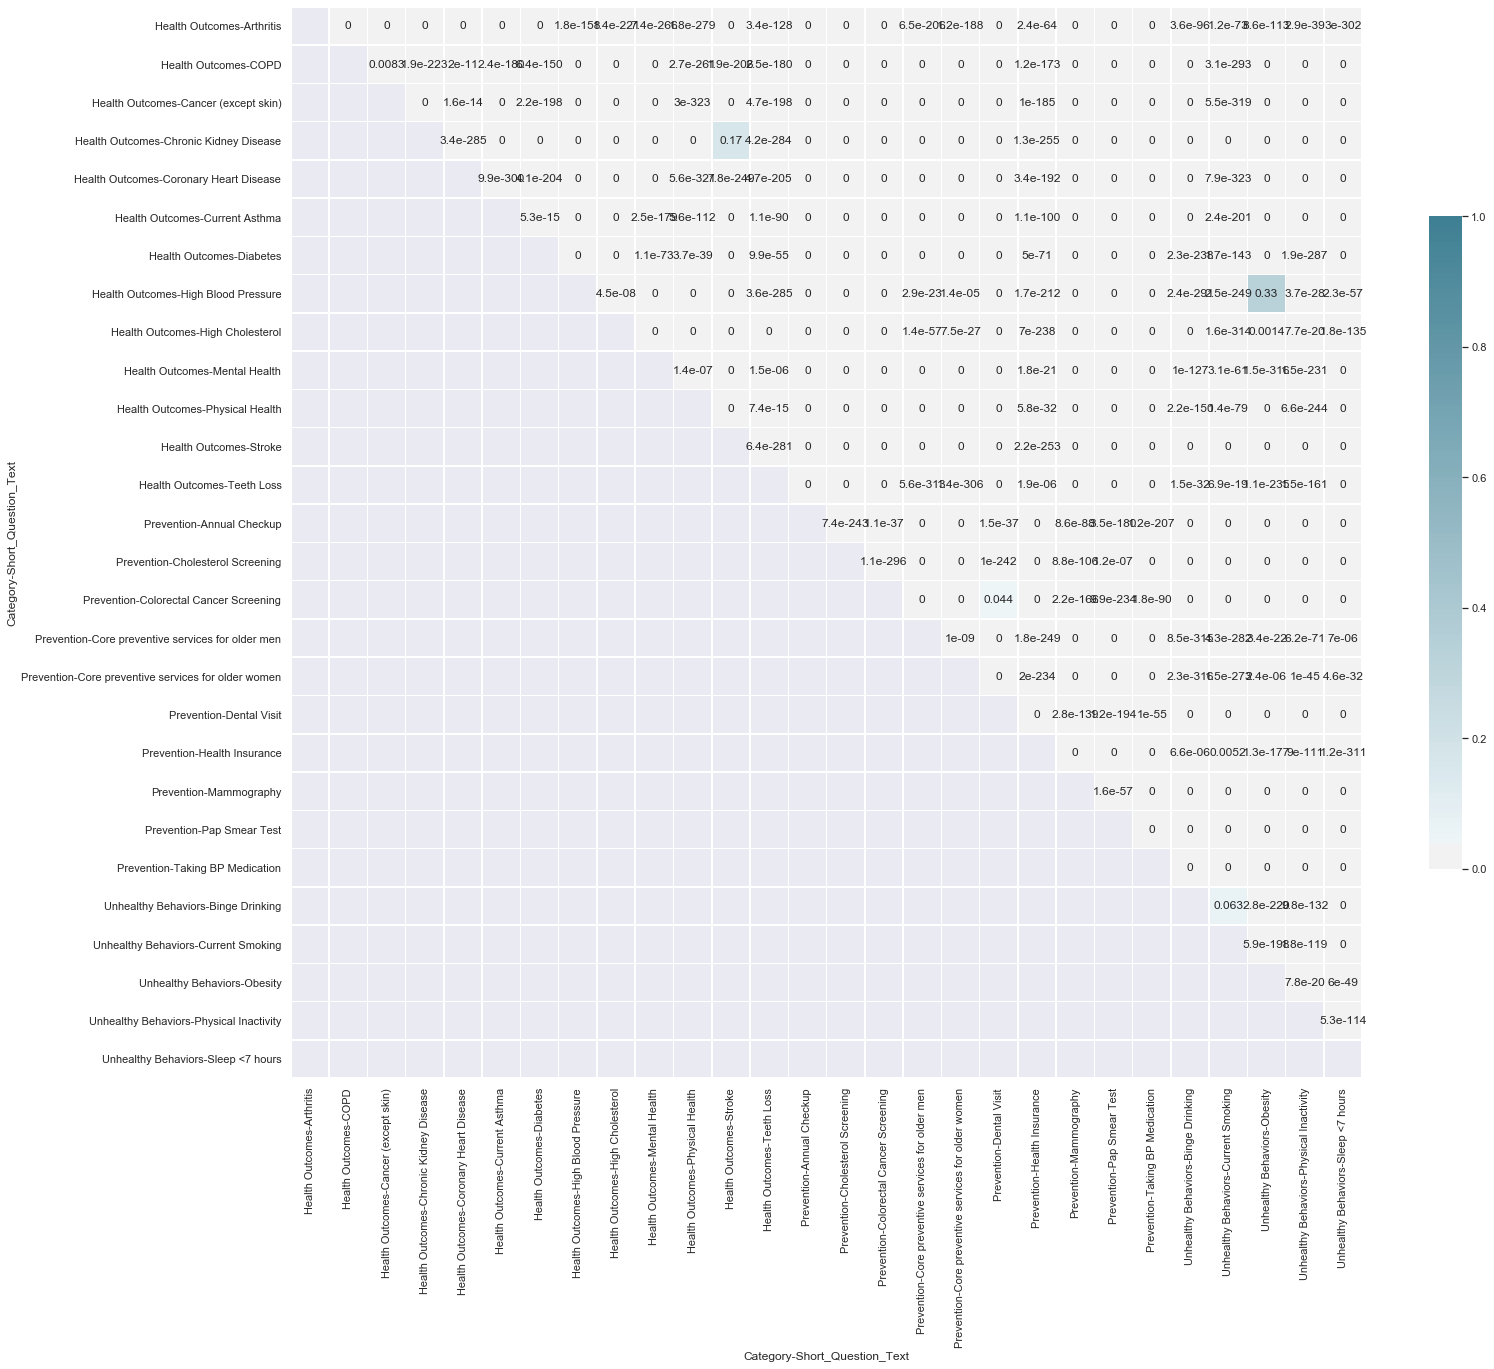

In [5]:
df = picked_view.reset_index(drop=True)
l = picked_view.shape[1]
i = 0
j = 0
r_squared = corrx
mask = np.triu(np.ones_like(r_squared, dtype=np.bool)) #.transpose()
#https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
for i in range(0,l):
    for j in range(0,l):
        x = df.iloc[:,i]
        y = df.iloc[:,j]
        z = pd.DataFrame([x,y]).transpose()
        z = z.dropna(how="any",axis=0)
        x = z.iloc[:,0]
        y = z.iloc[:,1]
        r_squared.iat[i,j] = stats.ttest_ind(x,y)[1]
        print(stats.ttest_ind(x,y))
        
sns.set(color_codes=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 24))
#Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(r_squared, mask=mask.transpose(),cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True) 

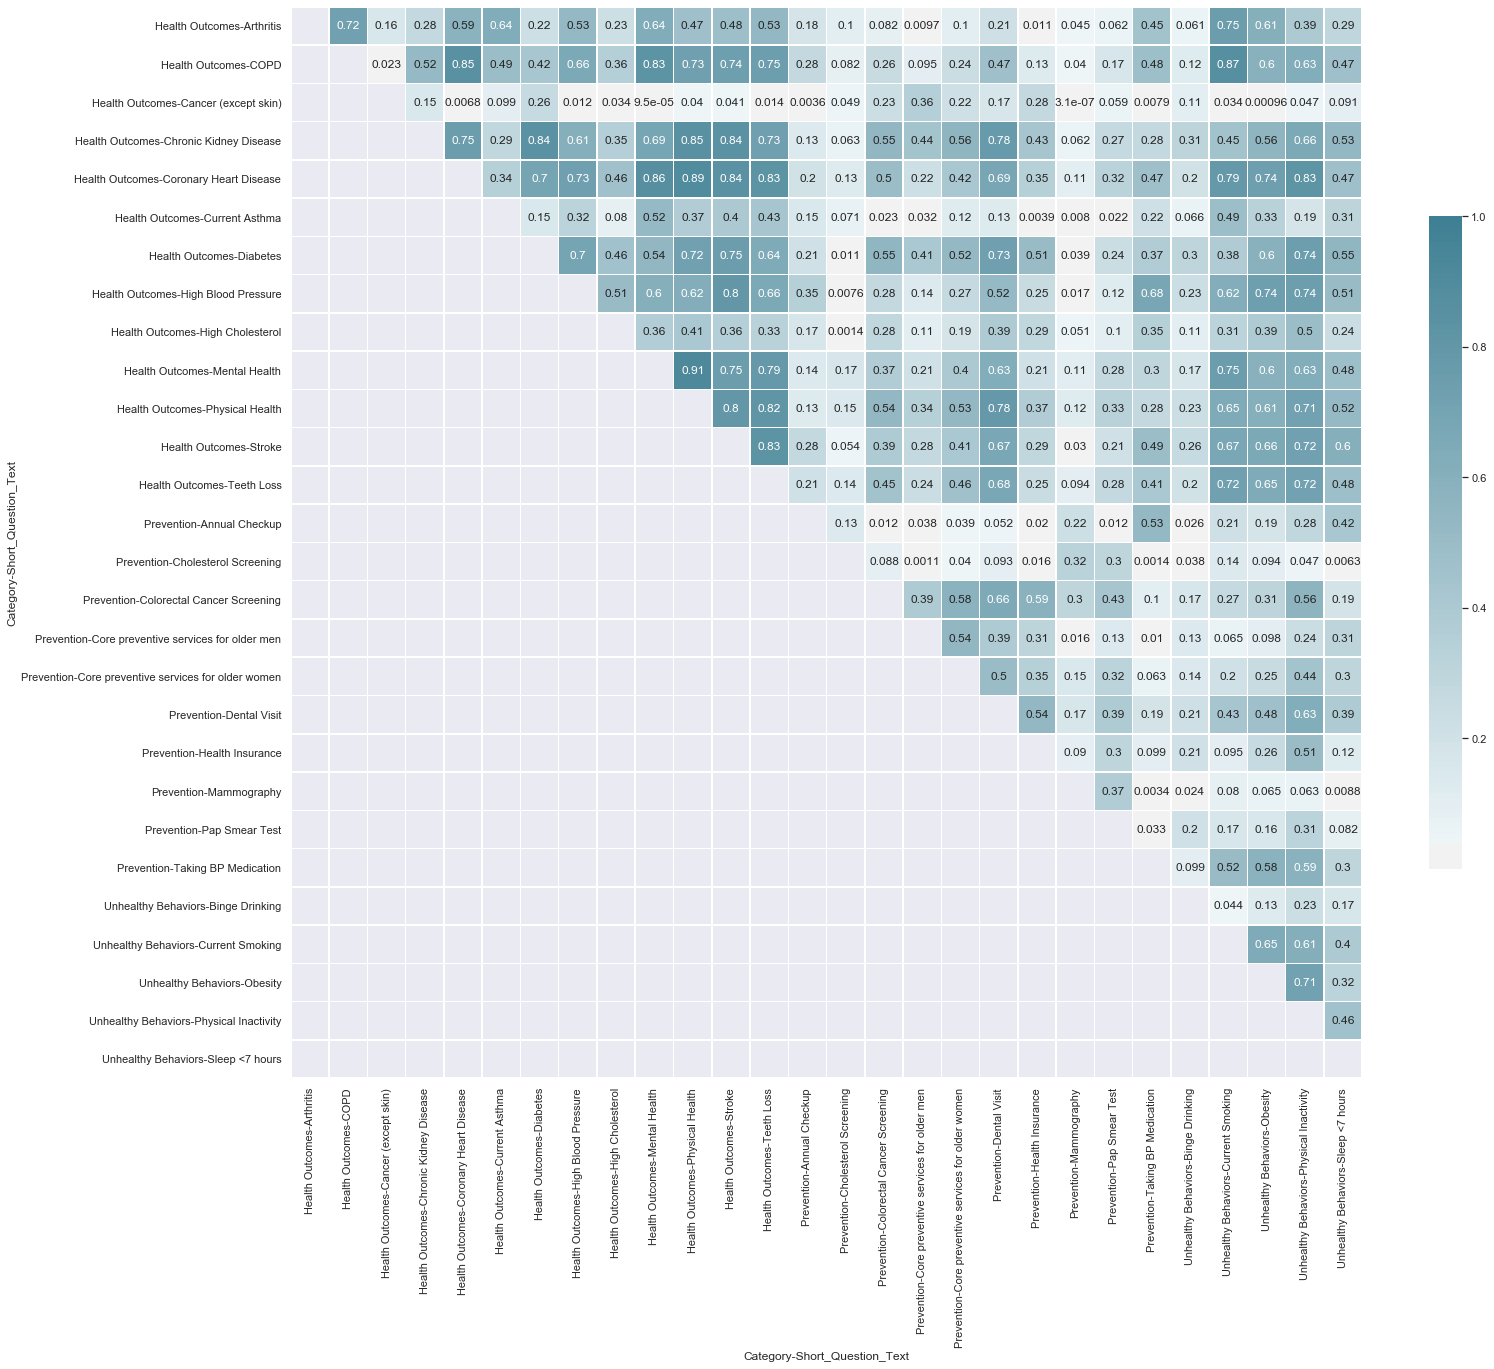

In [6]:
df = picked_view.reset_index(drop=True)
l = picked_view.shape[1]
i = 0
j = 0
r_squared = corrx
mask = np.triu(np.ones_like(r_squared, dtype=np.bool)) #.transpose()
#https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
for i in range(0,l):
    for j in range(0,l):
        x = df.iloc[:,i]
        y = df.iloc[:,j]
        z = pd.DataFrame([x,y]).transpose()
        z = z.dropna(how="any",axis=0)
        x = z.iloc[:,0]
        y = z.iloc[:,1]
        correlation_matrix = np.corrcoef(x, y)
        correlation_xy = correlation_matrix[0,1]
        r_squared.iat[i,j] = correlation_xy**2
        
sns.set(color_codes=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 24))
#Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(r_squared, mask=mask.transpose(),cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True) 

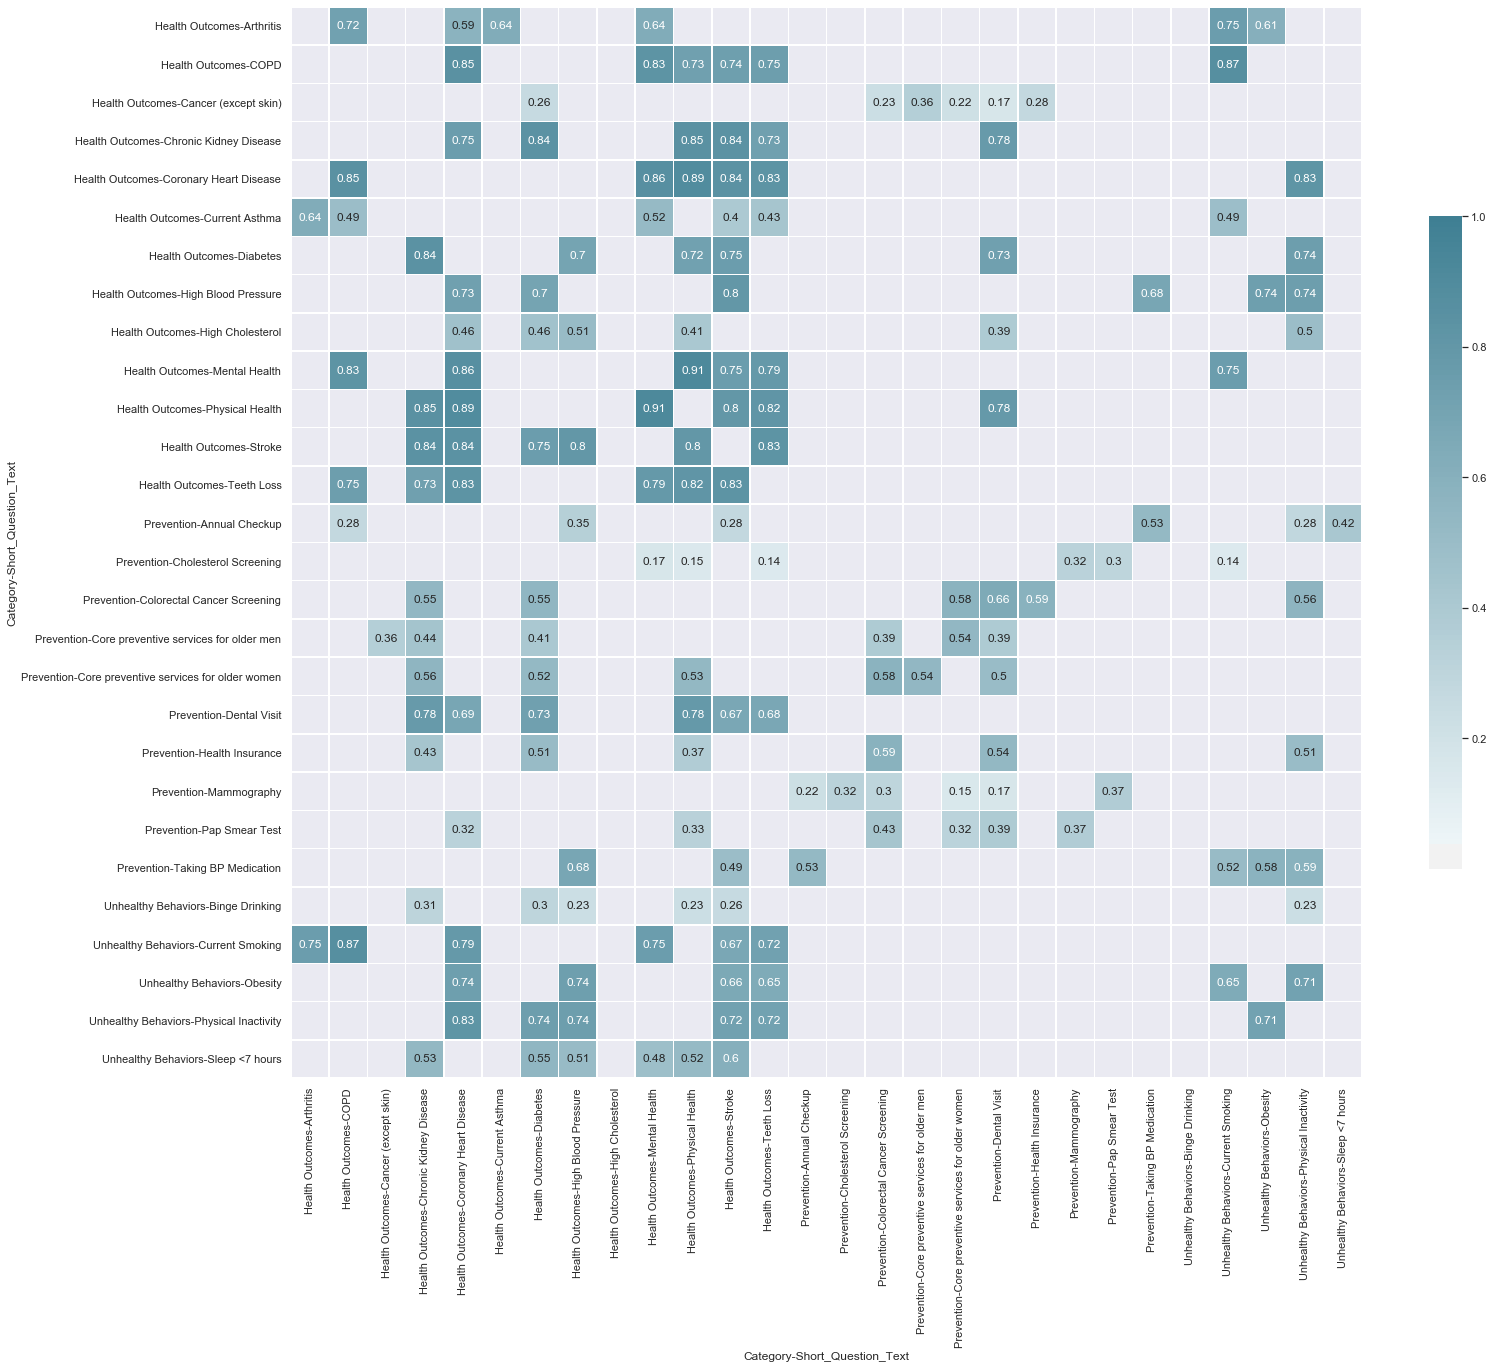

In [7]:
df = picked_view.reset_index(drop=True)
l = picked_view.shape[1]
i = 0
j = 0
r_squared = corrx
mask = np.triu(np.zeros([l,l], dtype=np.bool)) #.transpose()

#https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
for i in range(0,l):
    for j in range(0,l):
        if (r_squared.iat[i,j]<abs(r_squared.iloc[i,:].quantile([.75]).values)):
            mask[i,j]=True
        if (r_squared.iat[i,j]>0.999):
            mask[i,j]=True
sns.set(color_codes=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 24))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(r_squared, mask=mask,cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True) 

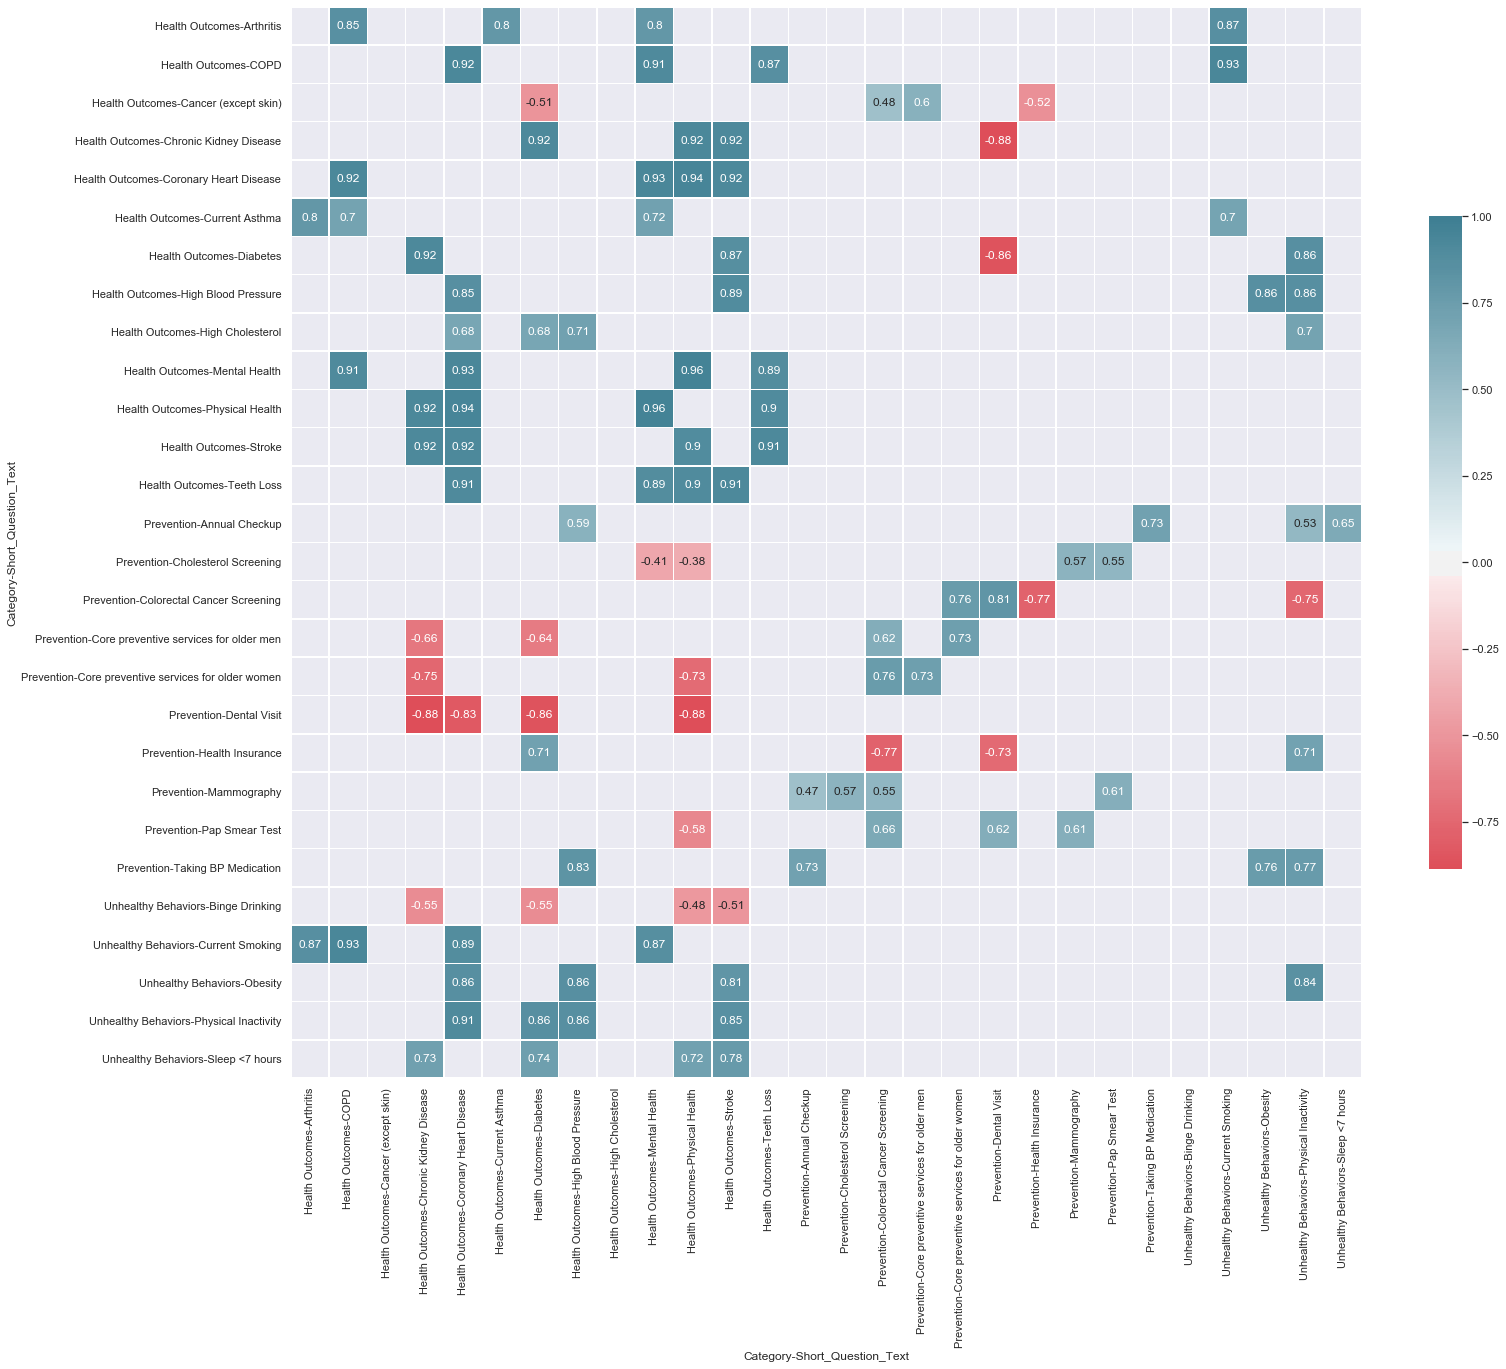

In [8]:
df = picked_view.reset_index(drop=True)
l = picked_view.shape[1]
i = 0
j = 0
r_squared = picked_view.corr()
mask = np.triu(np.zeros([l,l], dtype=np.bool)) #.transpose()

#https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
for i in range(0,l):
    for j in range(0,l):
        if (abs(r_squared.iat[i,j])<abs(abs(r_squared.iloc[i,:]).quantile([.85]).values)):
            mask[i,j]=True
        if (r_squared.iat[i,j]>0.999):
            mask[i,j]=True
sns.set(color_codes=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 24))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(r_squared, mask=mask,cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True) 

Category             Short_Question_Text
Unhealthy Behaviors  Binge Drinking         0.000000
                     Current Smoking        0.866289
                     Obesity                0.779960
                     Physical Inactivity    0.000000
                     Sleep <7 hours         0.000000
Name: (Health Outcomes, Arthritis), dtype: float64
Category             Short_Question_Text
Unhealthy Behaviors  Binge Drinking         0.000000
                     Current Smoking        0.931364
                     Obesity                0.000000
                     Physical Inactivity    0.000000
                     Sleep <7 hours         0.000000
Name: (Health Outcomes, COPD), dtype: float64
Category             Short_Question_Text
Unhealthy Behaviors  Binge Drinking         0.0
                     Current Smoking        0.0
                     Obesity                0.0
                     Physical Inactivity    0.0
                     Sleep <7 hours         0.0
Name: (Hea

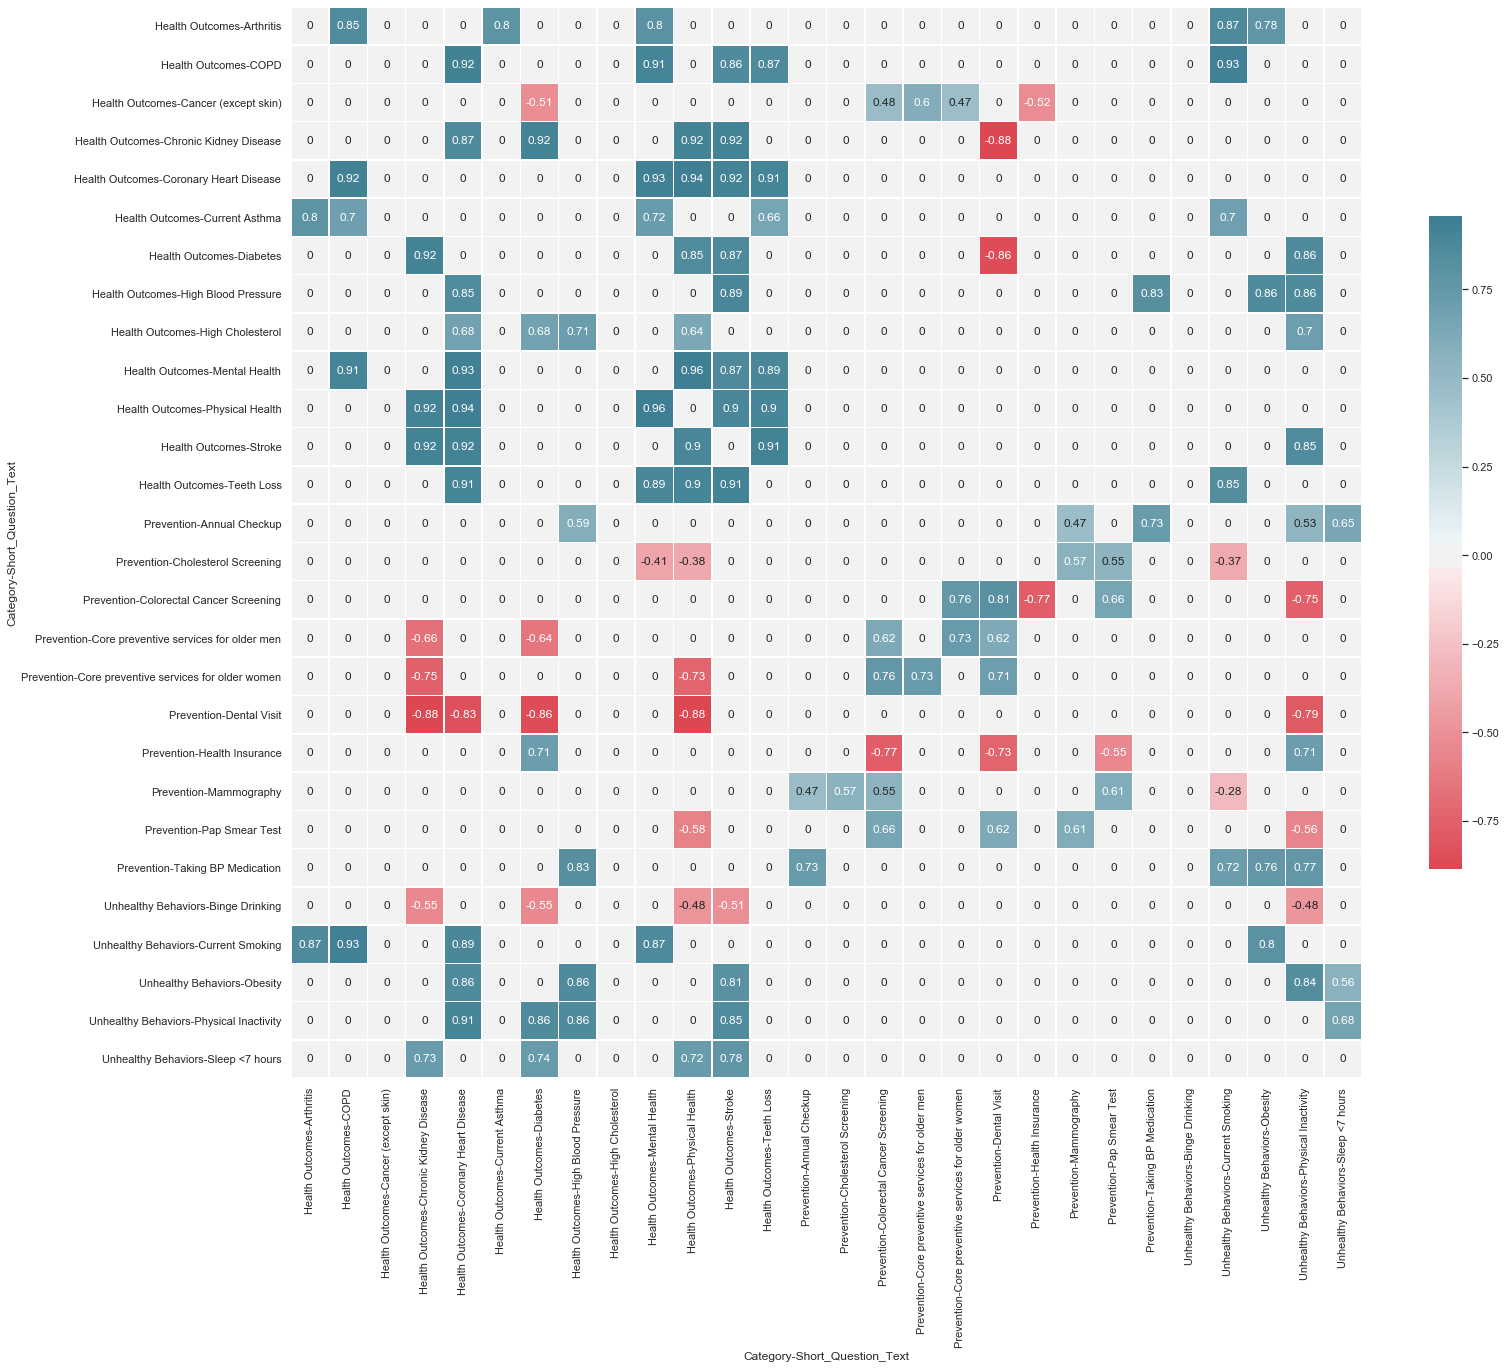

In [9]:
df = picked_view.reset_index(drop=True)
l = picked_view.shape[1]
i = 0
j = 0
r_squared = picked_view.corr()
k = []
#https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
for i in range(0,l):
    for j in range(0,l):
        if (abs(r_squared.iat[i,j])<abs(abs(r_squared.iloc[i,:]).quantile([.85]).values)):
            r_squared.iat[i,j]=  0.0
        if (r_squared.iat[i,j]>0.999):
            r_squared.iat[i,j]=  0.0
    rrr = r_squared.loc[r_squared.index[i],["Unhealthy Behaviors"]]
    rrr = rrr
    print(rrr)
    #if (abs(rrr) < 0.1):
        #k.append(i)

for i in range(0,len(k)):
    r_squared = r_squared.drop(r_squared.index[i])
        
sns.set(color_codes=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 24))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(r_squared, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True) 

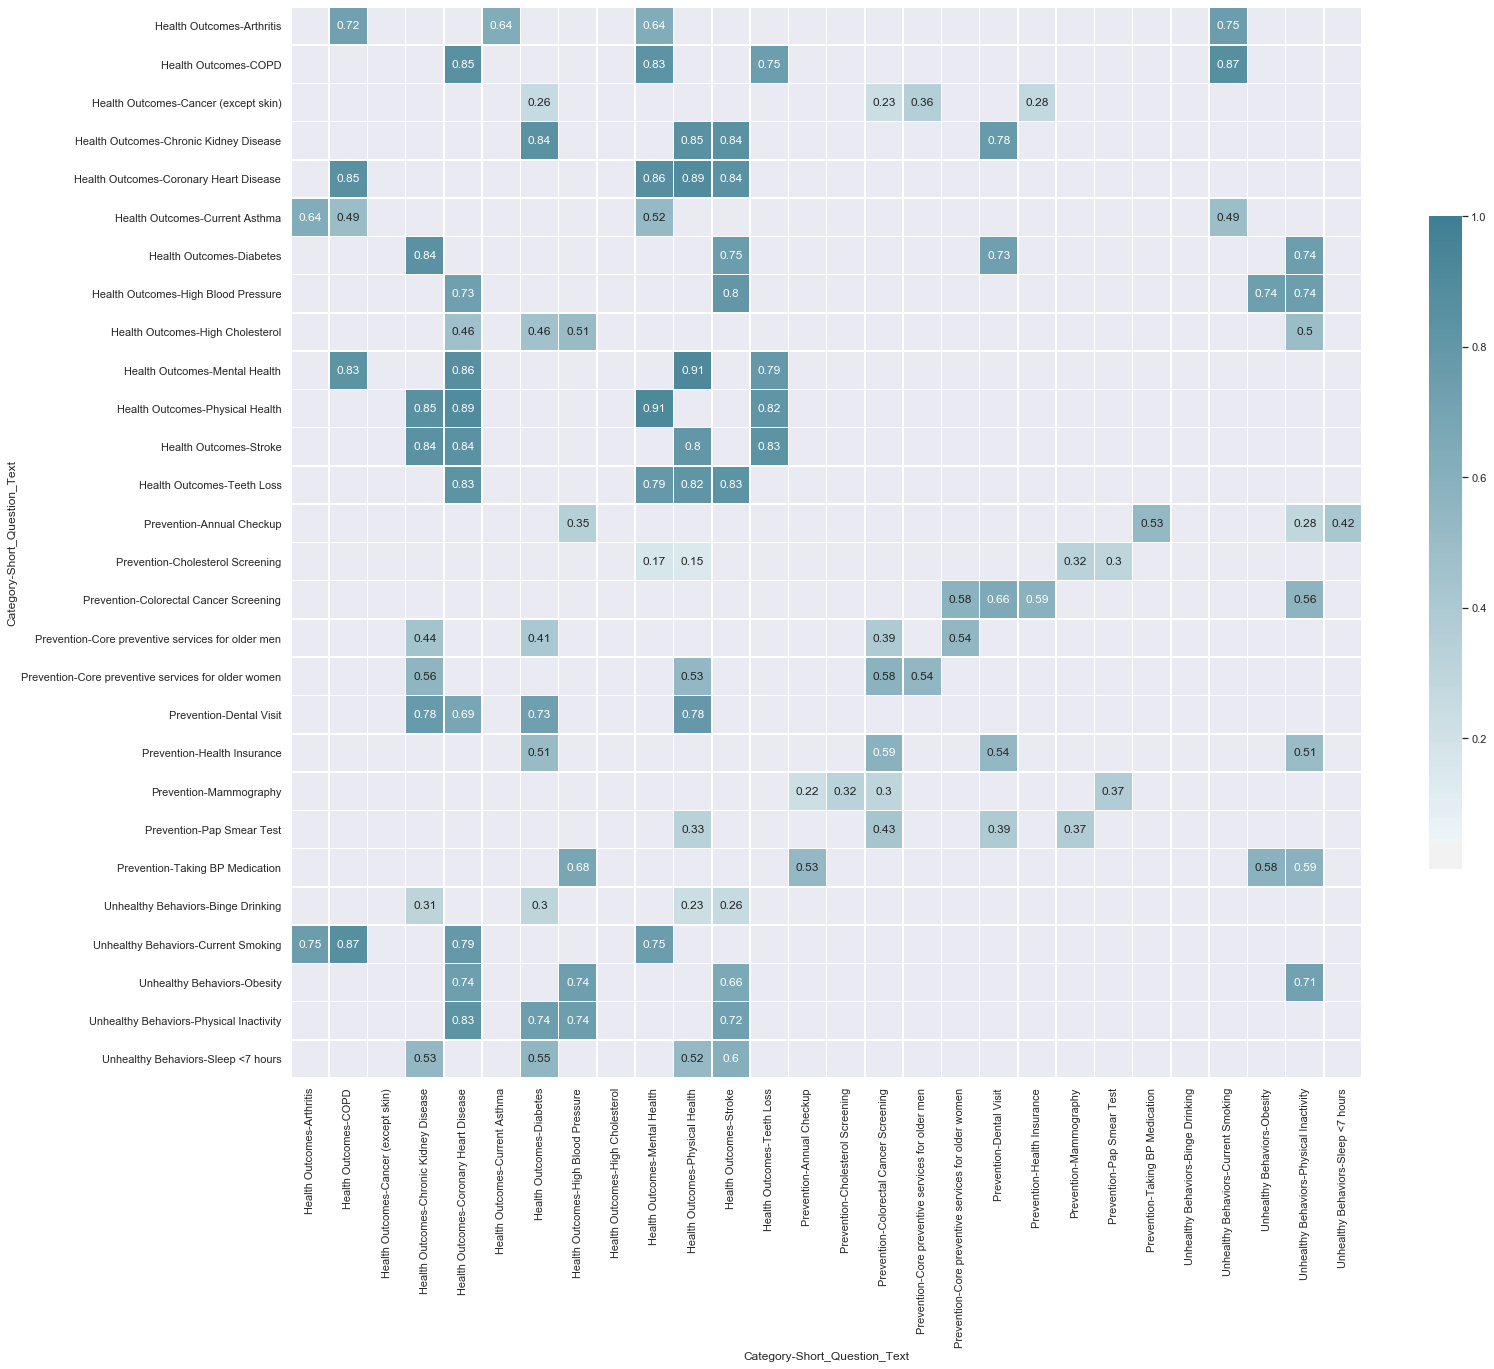

In [10]:
df = picked_view.reset_index(drop=True)
l = picked_view.shape[1]
i = 0
j = 0
r_squared = corrx
#mask = np.triu(np.ones_like(r_squared, dtype=np.bool)) #.transpose()
#https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
for i in range(0,l):
    for j in range(0,l):
        x = df.iloc[:,i]
        y = df.iloc[:,j]
        z = pd.DataFrame([x,y]).transpose()
        z = z.dropna(how="any",axis=0)
        x = z.iloc[:,0]
        y = z.iloc[:,1]
        correlation_matrix = np.corrcoef(x, y)
        correlation_xy = correlation_matrix[0,1]
        r_squared.iat[i,j] = correlation_xy**2
        
sns.set(color_codes=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 24))
#Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(r_squared, mask=mask,cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True) 

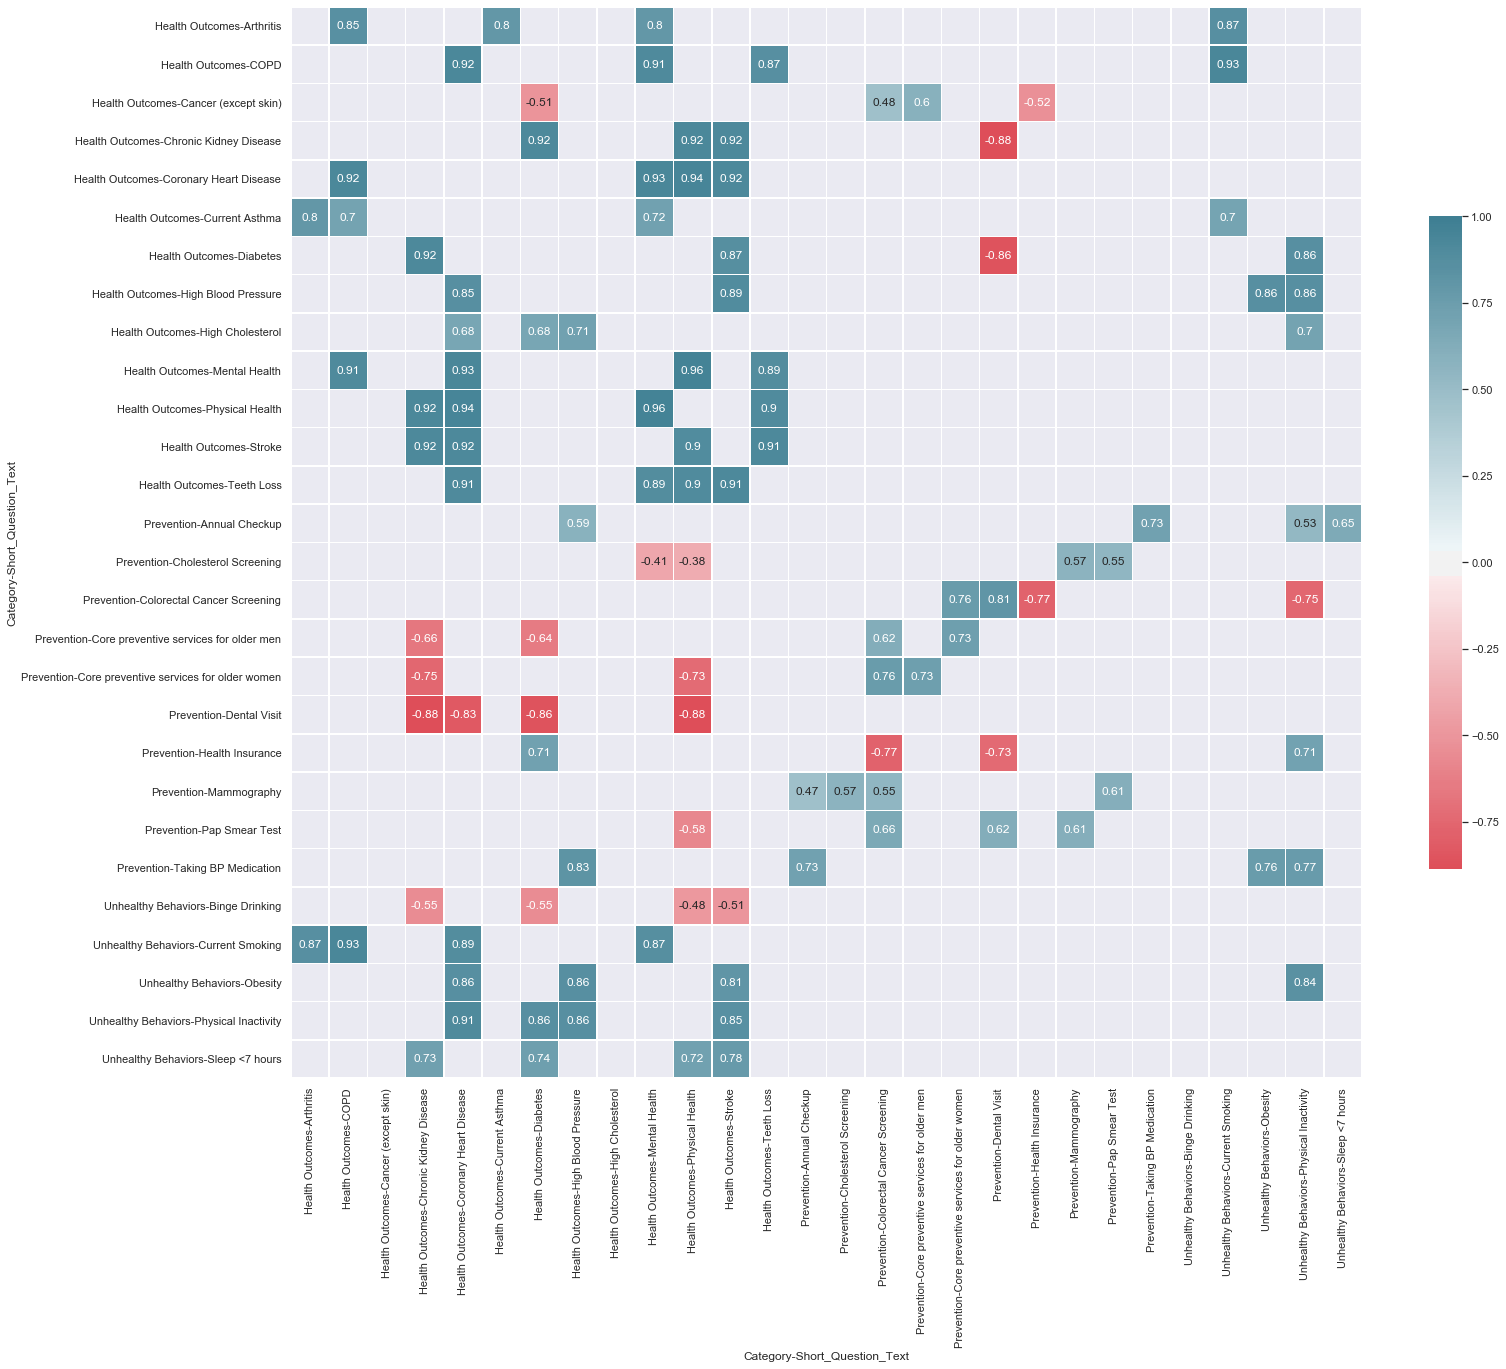

In [11]:
#df = picked_view.reset_index(drop=True)
#l = picked_view.shape[1]
#i = 0
#j = 0
r_squared = picked_view.corr()
#mask = np.triu(np.zeros([l,l], dtype=np.bool)) #.transpose()

#https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
#for i in range(0,l):
#    for j in range(0,l):
#        if (abs(r_squared.iat[i,j])>abs(r_squared.iloc[i,:]).quantile([.25]).values):
#            mask[i,j]=True
sns.set(color_codes=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 24))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(r_squared, mask=mask,cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True) 

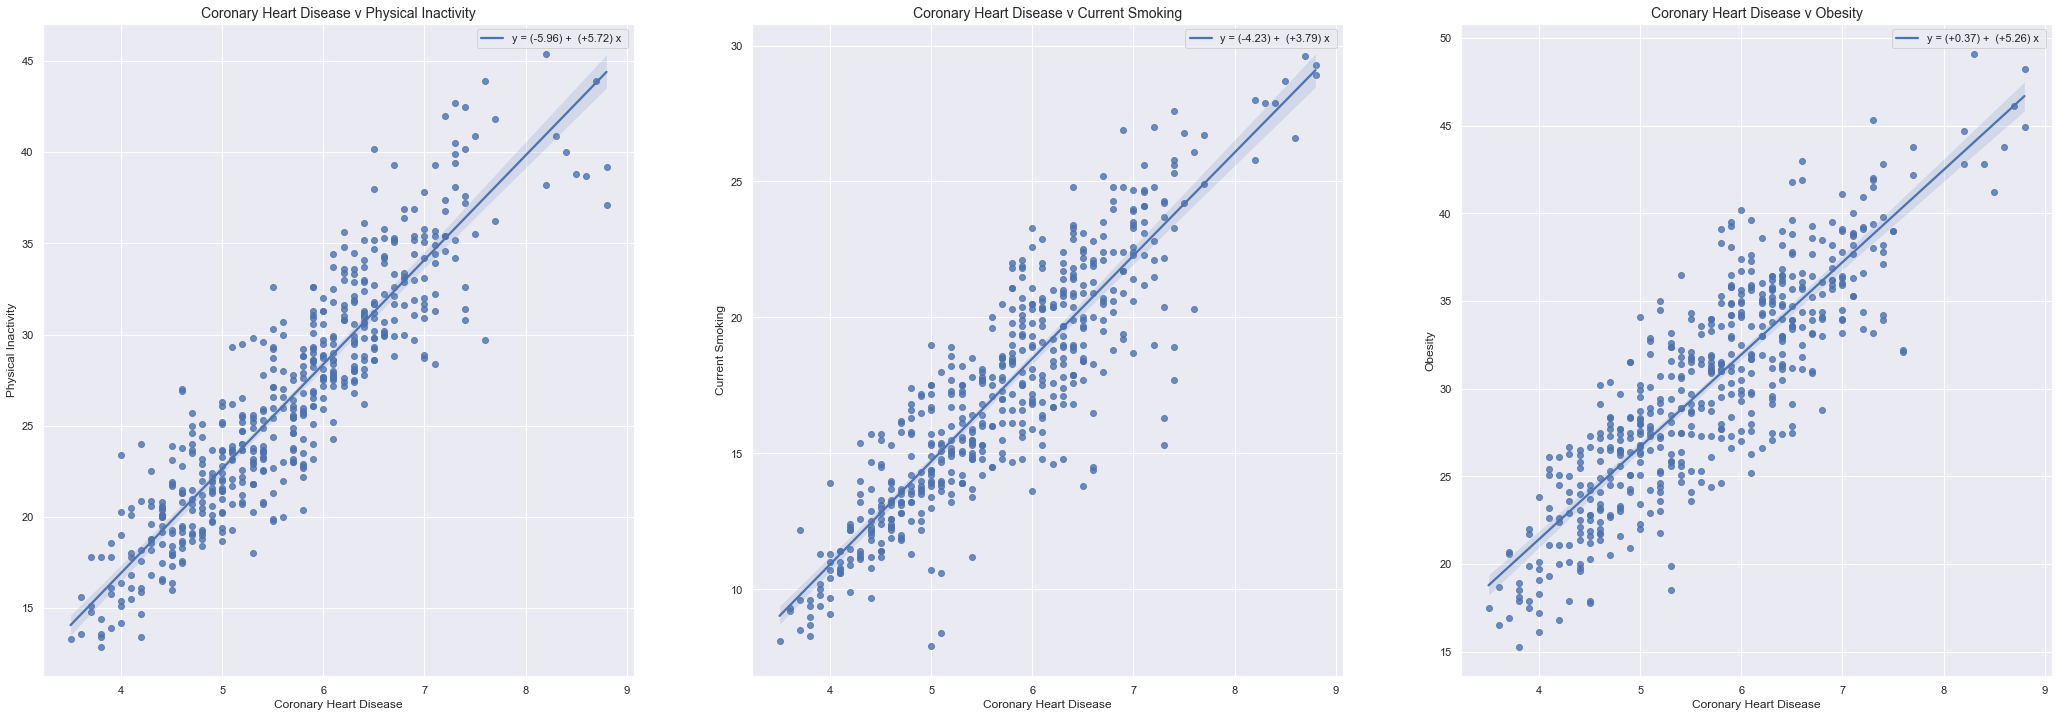

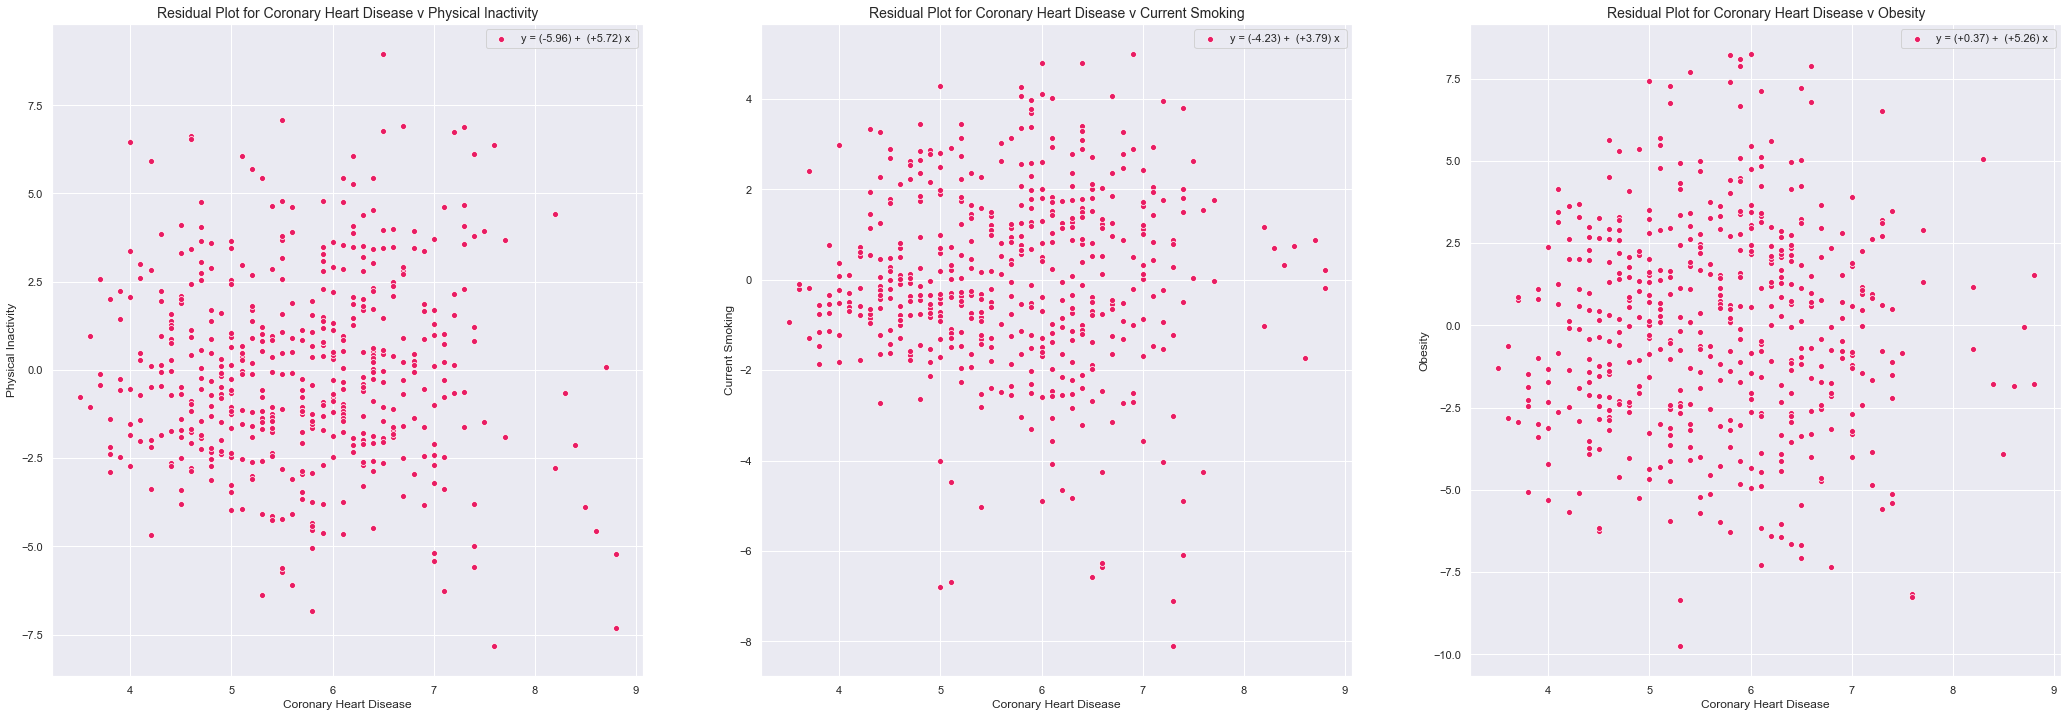

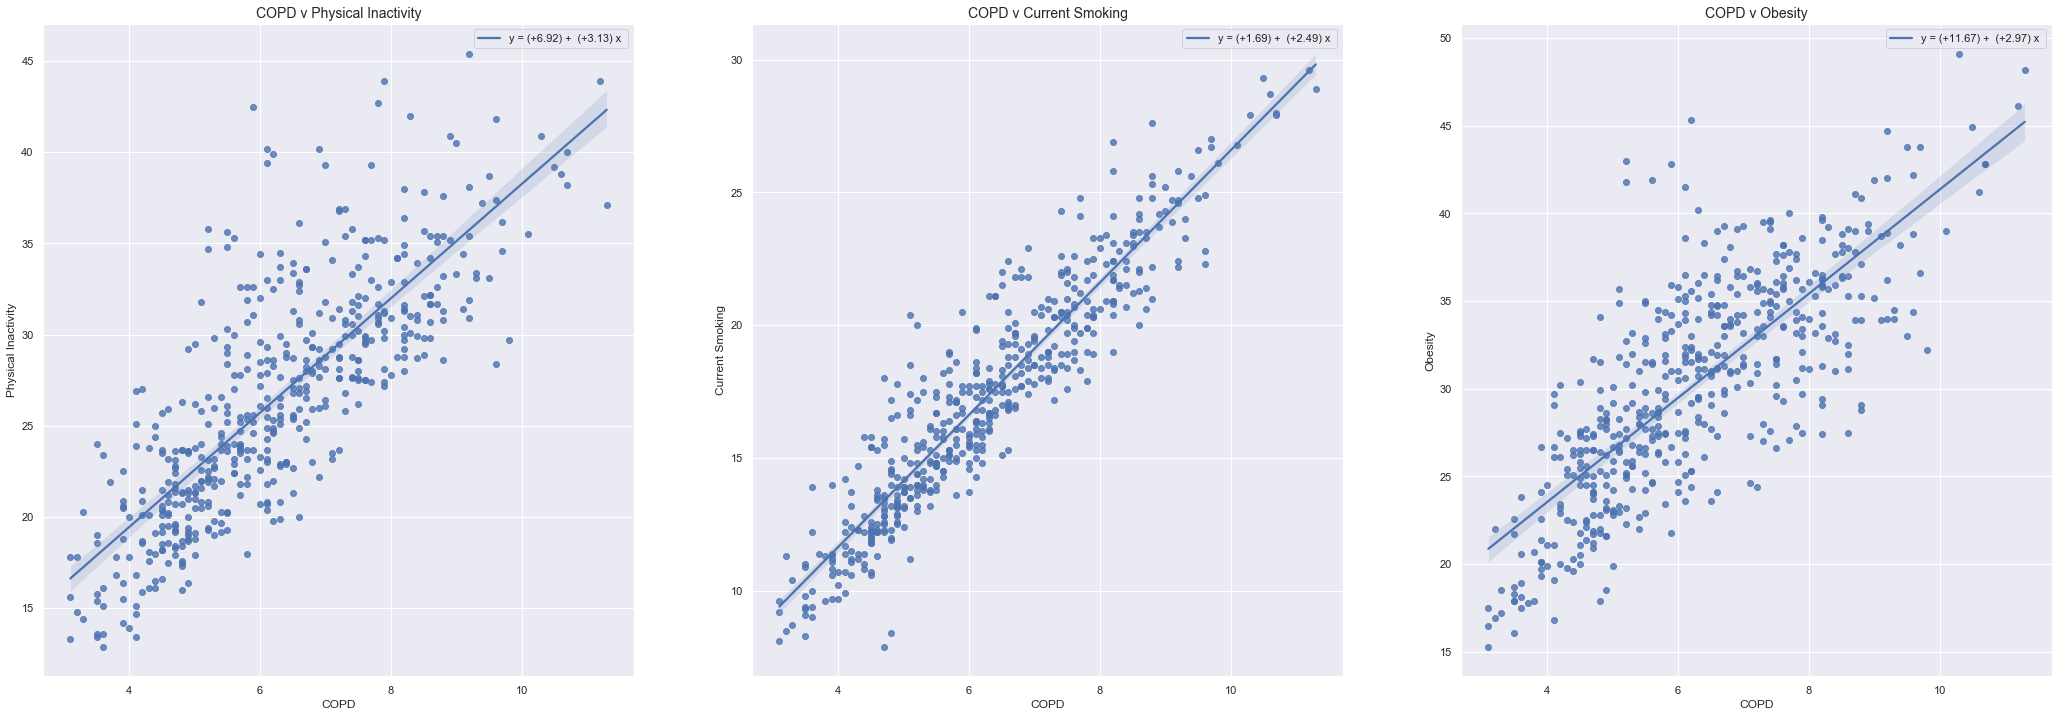

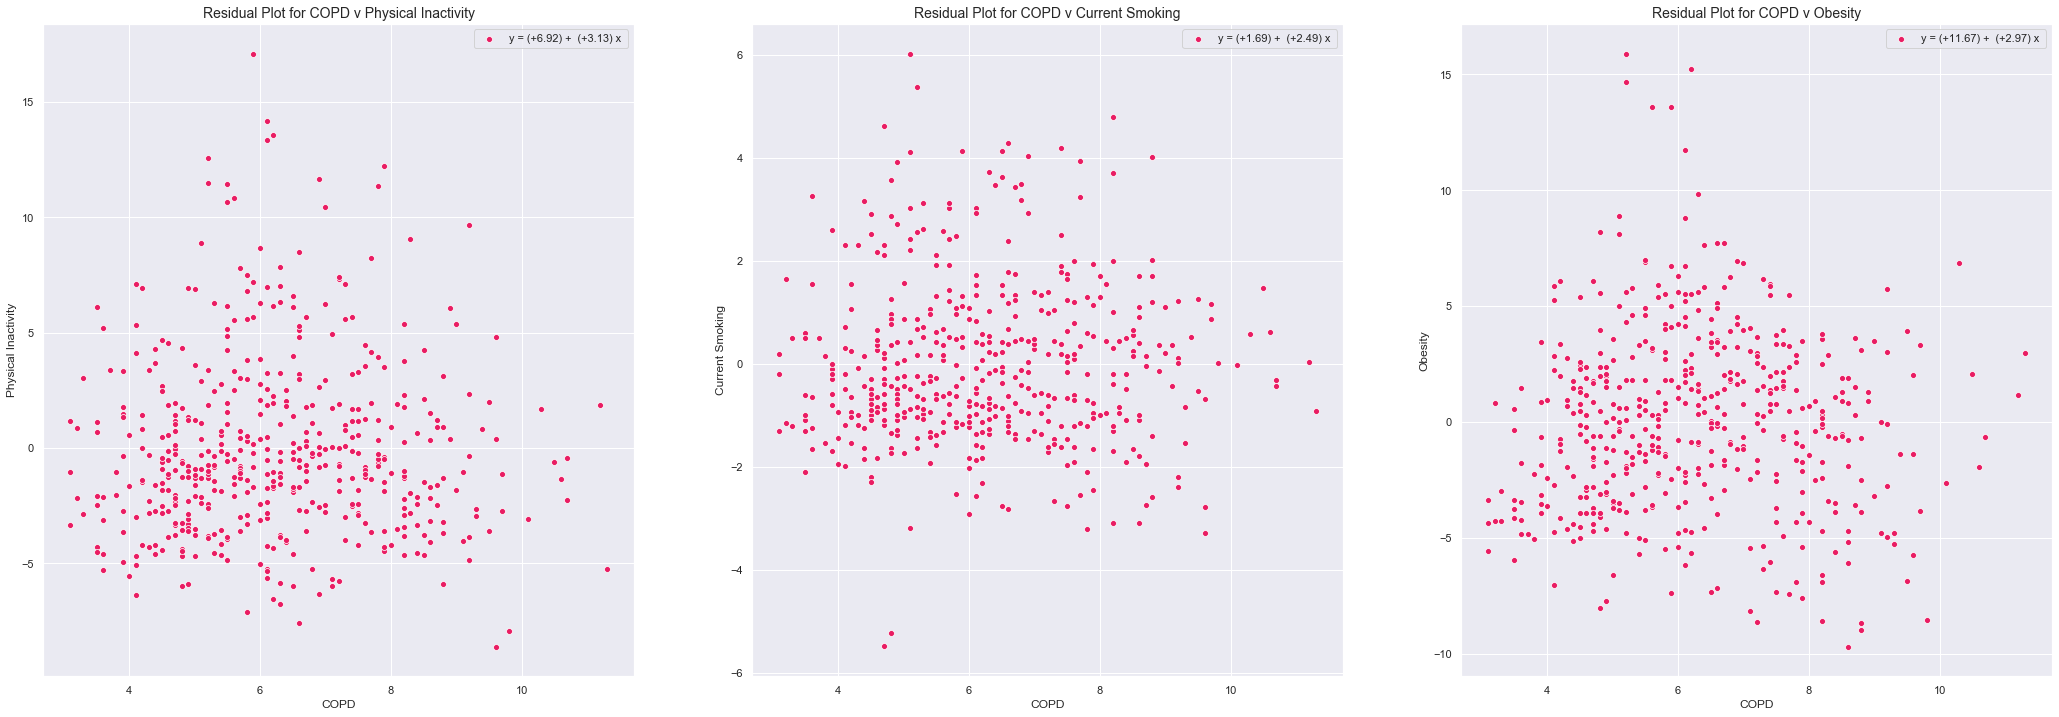

In [26]:
new_view = grand_view.reset_index().drop(["StateDesc","CityName"],axis=1,level=0)

behaviours = ageAdj[ageAdj["Category"]=="Unhealthy Behaviors"]["MeasureId"].unique()
outcomes = ageAdj[ageAdj["Category"]=="Health Outcomes"]["MeasureId"].unique()
preventions = ageAdj[ageAdj["Category"]=="Prevention"]["MeasureId"].unique()

measures = {"behaviours":behaviours,"outcomes":outcomes,"preventions":preventions}

new_view = new_view.unstack()

Dependents = []
Independents = []

Dependents.append(["Coronary Heart Disease"])
Independents.append(["Physical Inactivity","Current Smoking","Obesity"])

Dependents.append(["COPD"])
Independents.append(["Physical Inactivity","Current Smoking","Obesity"])

for index in range(len(Dependents)):
    Dependent = Dependents[index]
    Independent = Independents[index]
    ll = 1
    mm = len(Independent)
    n = 0
    m = [0] * mm
    b = [0] * mm
    fig = plt.figure(figsize=(12*mm,12*ll))
    for measurex in Dependent:
        for measurey in Independent:
            n+=1
            x = new_view[np.in1d(new_view.index.get_level_values(1), [measurex])].values
            y = new_view[np.in1d(new_view.index.get_level_values(1), [measurey])].values
            db = pd.DataFrame(data=[x.transpose(),y.transpose()],index=['x','y']).transpose()
            ax = fig.add_subplot(ll,mm,n)
            sns.regplot(x='x', y='y', data=db, ax=ax) # to not count outliers, add:   ,robust = True
            plt.title(measurex+" v "+measurey, fontsize=14)
            #https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html'
            m[n-1], b[n-1] = np.polyfit(x, y, 1)
            plt.xlabel(measurex)
            plt.ylabel(measurey)
            plt.legend(["y = ({0:+3.2f}) + ".format(b[n-1])+" ({0:+3.2f}) x ".format(m[n-1])])
    ax.figure.savefig(measurex+'_correlation.png')
    plt.show()
    n = 0
    fig = plt.figure(figsize=(12*mm,12*ll))
    for measurex in Dependent:
        for measurey in Independent:
            n+=1
            x = new_view[np.in1d(new_view.index.get_level_values(1), [measurex])].values
            y1 = new_view[np.in1d(new_view.index.get_level_values(1), [measurey])].values
            y2 = b[n-1] + m[n-1] * x
            y = y1 - y2
            db = pd.DataFrame(data=[x.transpose(),y.transpose()],index=['x','y']).transpose()
            ax = fig.add_subplot(ll,mm,n)
            sns.scatterplot(x='x', y='y', data=db, ax=ax,color=['#E91D63']) # to not count outliers, add:   ,robust = True
            plt.title("Residual Plot for "+measurex+" v "+measurey, fontsize=14)
            #https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html'
            plt.xlabel(measurex)
            plt.ylabel(measurey)
            plt.legend(["y = ({0:+3.2f}) + ".format(b[n-1])+" ({0:+3.2f}) x ".format(m[n-1])])
        ax.figure.savefig(measurex+'_correlation_residual.png')
    plt.show()

In [13]:
from sklearn import linear_model
import statsmodels.api as sm

new_view = grand_view.reset_index().drop(["StateDesc","CityName"],axis=1,level=0)

behaviours = ageAdj[ageAdj["Category"]=="Unhealthy Behaviors"]["MeasureId"].unique()
outcomes = ageAdj[ageAdj["Category"]=="Health Outcomes"]["MeasureId"].unique()
preventions = ageAdj[ageAdj["Category"]=="Prevention"]["MeasureId"].unique()

measures = {"behaviours":behaviours,"outcomes":outcomes,"preventions":preventions}

#new_view = new_view.unstack()


depCat.append("Health Outcomes")
Dependents.append("COPD")

indepCat.append(["Health Outcomes","Health Outcomes","Health Outcomes","Health Outcomes","Health Outcomes","Unhealthy Behaviors"])
Independents.append(['Coronary Heart Disease','Mental Health','Physical Health','Stroke','Teeth Loss','Current Smoking']) #["Sleep <7 hours","Obesity","Physical Inactivity","High Blood Pressure"]

depCat.append("Health Outcomes")
Dependents.append("Stroke")
indepCat.append(["Unhealthy Behaviors","Unhealthy Behaviors","Unhealthy Behaviors","Health Outcomes"])
Independents.append(["Sleep <7 hours","Obesity","Physical Inactivity","High Blood Pressure"])

depCat.append("Health Outcomes")
Dependents.append("Current Asthma")
indepCat.append(["Unhealthy Behaviors"])
Independents.append(["Current Smoking"])
indepCat[0].append(depCat[0])
Independents[0].append(Dependents[0])
arrays = [indepCat[0],Independents[0]]
tuples = list(zip(*arrays))

#for index in range(len(Dependents)):
clf = linear_model.LinearRegression()
X = new_view[tuples[:len(tuples)-1]]
Y = new_view[tuples[len(tuples)-1:len(tuples)]]
clf.fit(X,Y)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()

model.summary()

#equ = "y = ({0:+3.2f}) + ".format(clf.intercept_[0])
#for c in clf.coef_[0]:
#    equ = equ +" ({0:+3.2f}) x ".format(c)


#y_theory = np.zeros(101)
#x = np.zeros(101)
#for i in np.arange(0,100,1):
#    #y_actual = new_view[tuples[len(tuples)-1:len(tuples)]]
#    x[i] = i
#    y_theory[i] = clf.intercept_[0]
#    for c in clf.coef_[0]:
#        y_theory[i] =+ c * i
    #y = y1 - y2
#db = pd.DataFrame(data=[x,y_theory],index=['x','y']).transpose()
#sns.scatterplot(x='x', y='y', data=db, color=['#E91D63'])
    #plt.legend([+])
    #equ


NameError: name 'depCat' is not defined

In [19]:
from sklearn import linear_model
import statsmodels.api as sm

new_view = grand_view.reset_index().drop(["StateDesc","CityName"],axis=1,level=0)

behaviours = ageAdj[ageAdj["Category"]=="Unhealthy Behaviors"]["MeasureId"].unique()
outcomes = ageAdj[ageAdj["Category"]=="Health Outcomes"]["MeasureId"].unique()
preventions = ageAdj[ageAdj["Category"]=="Prevention"]["MeasureId"].unique()

measures = {"behaviours":behaviours,"outcomes":outcomes,"preventions":preventions}

#new_view = new_view.unstack()

Dependents = []
depCat = []
Independents = []
indepCat = []

depCat.append("Health Outcomes")
Dependents.append("Coronary Heart Disease")

indepCat.append(["Unhealthy Behaviors","Unhealthy Behaviors","Unhealthy Behaviors"])
Independents.append(["Physical Inactivity","Current Smoking","Obesity"])

depCat.append("Health Outcomes")
Dependents.append("COPD")

indepCat.append(["Unhealthy Behaviors","Unhealthy Behaviors","Unhealthy Behaviors"])
Independents.append(["Physical Inactivity","Current Smoking","Obesity"])

indepCat[0].append(depCat[0])
Independents[0].append(Dependents[0])
arrays = [indepCat[0],Independents[0]]
tuples = list(zip(*arrays))

#for index in range(len(Dependents)):
clf = linear_model.LinearRegression()
X = new_view[tuples[:len(tuples)-1]]
Y = new_view[tuples[len(tuples)-1:len(tuples)]]
clf.fit(X,Y)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     Health Outcomes_Coronary Heart Disease   R-squared:                       0.908
Model:                                                OLS   Adj. R-squared:                  0.908
Method:                                     Least Squares   F-statistic:                     1640.
Date:                                    Fri, 10 Jul 2020   Prob (F-statistic):          5.63e-257
Time:                                            15:01:56   Log-Likelihood:                -119.34
No. Observations:                                     500   AIC:                             246.7
Df Residuals:                                         496   BIC:                             263.5
Df Model:                                               3                                         
Covariance Type:                                nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.3769      0.069     20.079      0.000       1.242       1.512
('Unhealthy Behaviors', 'Physical Inactivity')     0.0771      0.004     18.132      0.000       0.069       0.085
('Unhealthy Behaviors', 'Current Smoking')         0.0959      0.006     16.931      0.000       0.085       0.107
('Unhealthy Behaviors', 'Obesity')                 0.0198      0.005      4.326      0.000       0.011       0.029
==============================================================================
Omnibus:                        0.382   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.497
Skew:                           0.028   Prob(JB):                        0.780
Kurtosis:                       2.856   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

new_view = grand_view.reset_index().drop(["StateDesc","CityName"],axis=1,level=0)

behaviours = ageAdj[ageAdj["Category"]=="Unhealthy Behaviors"]["MeasureId"].unique()
outcomes = ageAdj[ageAdj["Category"]=="Health Outcomes"]["MeasureId"].unique()
preventions = ageAdj[ageAdj["Category"]=="Prevention"]["MeasureId"].unique()

measures = {"behaviours":behaviours,"outcomes":outcomes,"preventions":preventions}

#new_view = new_view.unstack()

Dependents = []
depCat = []
Independents = []
indepCat = []

depCat.append("Health Outcomes")
Dependents.append("Coronary Heart Disease")

indepCat.append(["Unhealthy Behaviors","Unhealthy Behaviors","Unhealthy Behaviors","Unhealthy Behaviors","Prevention","Health Outcomes"])
Independents.append(["Sleep <7 hours","Obesity","Physical Inactivity","Current Smoking","Dental Visit","High Cholesterol"])

depCat.append("Health Outcomes")
Dependents.append("COPD")

indepCat.append(["Health Outcomes","Health Outcomes","Health Outcomes","Health Outcomes","Health Outcomes","Unhealthy Behaviors"])
Independents.append(['Coronary Heart Disease','Mental Health','Physical Health','Stroke','Teeth Loss','Current Smoking']) #["Sleep <7 hours","Obesity","Physical Inactivity","High Blood Pressure"]

depCat.append("Health Outcomes")
Dependents.append("Stroke")
indepCat.append(["Unhealthy Behaviors","Unhealthy Behaviors","Unhealthy Behaviors","Health Outcomes"])
Independents.append(["Sleep <7 hours","Obesity","Physical Inactivity","High Blood Pressure"])

depCat.append("Health Outcomes")
Dependents.append("Current Asthma")
indepCat.append(["Unhealthy Behaviors"])
Independents.append(["Current Smoking"])
indepCat[0].append(depCat[0])
Independents[0].append(Dependents[0])
arrays = [indepCat[0],Independents[0]]
tuples = list(zip(*arrays))

#for index in range(len(Dependents)):
clf = linear_model.LinearRegression()
X = new_view[tuples[:len(tuples)-1]]
Y = new_view[tuples[len(tuples)-1:len(tuples)]]
clf.fit(X,Y)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()

model.summary()

In [15]:
from sklearn import linear_model
import statsmodels.api as sm

corrx = grand_view.corr()
y_var_title = []
y_var_values = []
x_var_title = []
x_var_values = []
modelsList = []

#xxx = xxx[np.in1d(xxx.index.get_level_values(0), ["Unhealthy Behaviors"])]

for i in corrx.index:
    y_var_title.append(i)
    top = corrx[i]  
    top = abs(top[23:28]).sort_values(ascending=False)
    x_var_title.append(top[0:3].index) #top[23:28].index
    clf = linear_model.LinearRegression()
    X = new_view[x_var_title[-1]]
    Y = new_view[y_var_title[-1]]
    #X = X.join(Y).dropna(how="any",axis=0).loc[:,x_var_title[-1]]
    #Y = X.join(Y).dropna(how="any",axis=0).loc[:,y_var_title[-1]]
    if (X.dropna(how="any",axis=0).shape[0] > 499) & (Y.dropna(how="any",axis=0).shape[0] > 499) :
        clf.fit(X,Y)
        X = sm.add_constant(X) # adding a constant
        model = sm.OLS(Y, X).fit()
        modelsList.append([model.rsquared,model])

modelsList = sorted(modelsList, key=lambda x: x[0], reverse=True)
for m in modelsList:
    print(m[1].summary())

                                        OLS Regression Results                                       
Dep. Variable:     ('Unhealthy Behaviors', 'Binge Drinking')   R-squared:                       1.000
Model:                                                   OLS   Adj. R-squared:                  1.000
Method:                                        Least Squares   F-statistic:                 9.236e+30
Date:                                       Fri, 10 Jul 2020   Prob (F-statistic):               0.00
Time:                                               14:40:45   Log-Likelihood:                 15256.
No. Observations:                                        500   AIC:                        -3.051e+04
Df Residuals:                                            497   BIC:                        -3.049e+04
Df Model:                                                  2                                         
Covariance Type:                                   nonrobust                      

In [16]:
from sklearn import linear_model
import statsmodels.api as sm

corrx = grand_view.corr()
y_var_title = []
y_var_values = []
x_var_title = []
x_var_values = []
modelsList = []

#xxx = xxx[np.in1d(xxx.index.get_level_values(0), ["Unhealthy Behaviors"])]

for i in corrx.index:
    y_var_title.append(i)
    top = corrx[i]  
    top = abs(top[12:23]).sort_values(ascending=False)
    x_var_title.append(top[0:3].index) #top[23:28].index
    clf = linear_model.LinearRegression()
    X = new_view[x_var_title[-1]]
    Y = new_view[y_var_title[-1]]
    #X = X.join(Y).dropna(how="any",axis=0).loc[:,x_var_title[-1]]
    #Y = X.join(Y).dropna(how="any",axis=0).loc[:,y_var_title[-1]]
    if (X.dropna(how="any",axis=0).shape[0] > 499) & (Y.dropna(how="any",axis=0).shape[0] > 499) :
        clf.fit(X,Y)
        X = sm.add_constant(X) # adding a constant
        model = sm.OLS(Y, X).fit()
        modelsList.append([model.rsquared,model])

modelsList = sorted(modelsList, key=lambda x: x[0], reverse=True)
for m in modelsList:
    print(m[1].summary())

                                    OLS Regression Results                                   
Dep. Variable:     ('Health Outcomes', 'Teeth Loss')   R-squared:                       1.000
Model:                                           OLS   Adj. R-squared:                  1.000
Method:                                Least Squares   F-statistic:                 1.671e+31
Date:                               Fri, 10 Jul 2020   Prob (F-statistic):               0.00
Time:                                       14:48:11   Log-Likelihood:                 15186.
No. Observations:                                500   AIC:                        -3.036e+04
Df Residuals:                                    496   BIC:                        -3.035e+04
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                                                            

In [18]:
corrx["Unhealthy Behaviors"]

Short_Question_Text                                           Binge Drinking  \
Category            Short_Question_Text                                        
Health Outcomes     Arthritis                                      -0.246637   
                    COPD                                           -0.345979   
                    Cancer (except skin)                            0.328989   
                    Chronic Kidney Disease                         -0.552939   
                    Coronary Heart Disease                         -0.442221   
                    Current Asthma                                 -0.257045   
                    Diabetes                                       -0.548920   
                    High Blood Pressure                            -0.483299   
                    High Cholesterol                               -0.324906   
                    Mental Health                                  -0.413344   
                    Physical Health                                -0.483647   
                    Stroke                                         -0.508117   
                    Teeth Loss                                     -0.443472   
Prevention          Annual Checkup                                 -0.160438   
                    Cholesterol Screening                           0.195181   
                    Colorectal Cancer Screening                     0.407771   
                    Core preventive services for older men          0.366450   
                    Core preventive services for older women        0.379082   
                    Dental Visit                                    0.461892   
                    Health Insurance                               -0.453460   
                    Mammography                                     0.156449   
                    Pap Smear Test                                  0.452765   
                    Taking BP Medication                           -0.314508   
Unhealthy Behaviors Binge Drinking                                  1.000000   
                    Current Smoking                                -0.210677   
                    Obesity                                        -0.364294   
                    Physical Inactivity                            -0.481953   
                    Sleep <7 hours                                 -0.408081   

Short_Question_Text                                           Current Smoking  \
Category            Short_Question_Text                                         
Health Outcomes     Arthritis                                        0.866289   
                    COPD                                             0.931364   
                    Cancer (except skin)                             0.184630   
                    Chronic Kidney Disease                           0.672786   
                    Coronary Heart Disease                           0.886894   
                    Current Asthma                                   0.697537   
                    Diabetes                                         0.614622   
                    High Blood Pressure                              0.785814   
                    High Cholesterol                                 0.561215   
                    Mental Health                                    0.868193   
                    Physical Health                                  0.804421   
                    Stroke                                           0.820210   
                    Teeth Loss                                       0.847900   
Prevention          Annual Checkup                                   0.461662   
                    Cholesterol Screening                           -0.368155   
                    Colorectal Cancer Screening                     -0.516070   
                    Core preventive services for older men          -0.255114   
                    Core preventive services for older women

In [ ]:
Dependents = []
depCat = []
Independents = []
indepCat = []

depCat.append("Health Outcomes")
Dependents.append("Coronary Heart Disease")

indepCat.append(["Unhealthy Behaviors","Unhealthy Behaviors","Unhealthy Behaviors","Unhealthy Behaviors","Prevention","Health Outcomes"])
Independents.append(["Sleep <7 hours","Obesity","Physical Inactivity","Current Smoking","Dental Visit","High Cholesterol"])

depCat.append("Health Outcomes")
Dependents.append("COPD")

indepCat.append(["Health Outcomes","Health Outcomes","Health Outcomes","Health Outcomes","Health Outcomes","Unhealthy Behaviors"])
Independents.append(['Coronary Heart Disease','Mental Health','Physical Health','Stroke','Teeth Loss','Current Smoking']) #["Sleep <7 hours","Obesity","Physical Inactivity","High Blood Pressure"]

depCat.append("Health Outcomes")
Dependents.append("Stroke")
indepCat.append(["Unhealthy Behaviors","Unhealthy Behaviors","Unhealthy Behaviors","Health Outcomes"])
Independents.append(["Sleep <7 hours","Obesity","Physical Inactivity","High Blood Pressure"])

depCat.append("Health Outcomes")
Dependents.append("Current Asthma")
indepCat.append(["Unhealthy Behaviors"])
Independents.append(["Current Smoking"])
indepCat[0].append(depCat[0])
Independents[0].append(Dependents[0])
arrays = [indepCat[0],Independents[0]]
tuples = list(zip(*arrays))

#for index in range(len(Dependents)):
clf = linear_model.LinearRegression()
X = new_view[tuples[:len(tuples)-1]]
Y = new_view[tuples[len(tuples)-1:len(tuples)]]
clf.fit(X,Y)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()

model.summary()

sns.set(color_codes=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 24))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)#['#E91D63','#FF467C','#FF6695','#FF84B0','#FFA2CB','#FFC0E7','#FFDEFF','#FFFCFF','#FFFFFF', '#FAFFFF', '#DAFFFF', '#BAFFFF', '#99FFFF', '#78FFED', '#52FFD1', '#1CF8B5']

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrx,cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

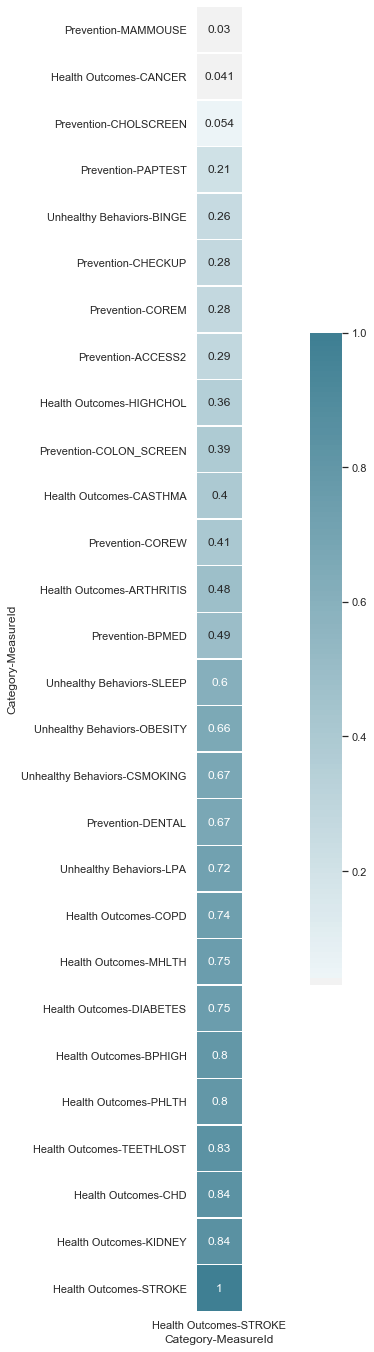

In [31]:
corrx = corr

corrx = corrx[np.in1d(corrx.index.get_level_values(1), ["STROKE"])]
corrx = corrx.transpose().sort_values(by=[("Health Outcomes", "STROKE")],axis=0, ascending=True)

sns.set(color_codes=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 24))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)#['#E91D63','#FF467C','#FF6695','#FF84B0','#FFA2CB','#FFC0E7','#FFDEFF','#FFFCFF','#FFFFFF', '#FAFFFF', '#DAFFFF', '#BAFFFF', '#99FFFF', '#78FFED', '#52FFD1', '#1CF8B5']

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrx,cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)